Based on your project's objectives and guidelines, here’s a comprehensive plan addressing your question about deep learning and classical ML for predicting job satisfaction:

1. **Baseline Classical ML Model**: Start by implementing a baseline classical machine learning model. This will help establish a foundational performance level, making it easier to assess the improvements (if any) achieved by the deep learning approach. Techniques such as Random Forests, SVMs, or Gradient Boosting can serve as effective baselines.

2. **Multi-Label and Multi-Category Columns**: With your dataset containing multi-label columns, you’ll need specific preprocessing:
   - **Label Encoding**: Consider label encoding for each multi-category variable. Using embeddings in the deep learning model could also be beneficial for high-cardinality categorical features.
   - **One-Hot Encoding**: This works well for classical ML models but can inflate feature space if there are many categories.
   - **Embedding Layers in Deep Learning**: For deep learning models, embedding layers are recommended for multi-category features, especially when categories have relationships or orders.

3. **Deep Learning Model**: Given your project’s scope, building a deep learning model can be advantageous:
   - **Architecture**: Use a feedforward neural network initially, with embedding layers for multi-category columns. Test deeper architectures or even explore Transformer models if you have sufficient computational resources.
   - **Multi-Label Support**: Deep learning can handle multi-label outputs effectively, especially with architectures designed for such purposes.
   - **TF-IDF Features**: If text-based features are included, you can incorporate TF-IDF or even pre-trained embeddings.

4. **Evaluation and Comparison**: Use consistent metrics and protocols for both models. Since the project requires a concise presentation, focus on:
   - **Comparison with Evaluation Protocol**: Metrics such as accuracy, F1-score, or AUC-ROC will give insights into model performance.
   - **Interpretation**: Showcase how each model interprets and weighs the features affecting job satisfaction. SHAP or LIME can help interpret deep learning models.

5. **Presentation and Submission**: Your presentation should emphasize the steps, challenges (especially with multi-label encoding), and the performance comparison between classical and deep learning models. Include insights about whether the additional complexity of deep learning yielded significantly better results.

Let’s start a structured approach to set up your project, covering essential steps from data exploration and preprocessing to model implementation and evaluation. Here’s how we can proceed:

### Step 1: Data Exploration and Cleaning
   - **Load and Inspect the Data**: Begin by examining the structure, checking data types, and getting an initial summary (e.g., `info()`, `describe()` in Python).
   - **Check for Missing Values**: Identify any columns with missing values and decide how to handle them. Since you’re avoiding imputation for `JobSat`, removing NaNs for this column is preferable, but for other columns, consider imputation based on relevance (e.g., mean, median for numerical, mode for categorical).
   - **Identify Outliers**: Use visualization (e.g., box plots) or statistical methods (like IQR) to identify potential outliers, particularly in numerical features that may skew results.
   - **Basic Data Cleaning**: Clean up any erroneous or inconsistent entries (like unexpected strings or symbols in numerical columns). Ensure consistent formatting across columns.

### Step 2: Data Preprocessing
   - **Data Leakage Prevention**: Carefully separate training and test data to avoid any data leakage, particularly if using temporal data. Refrain from any transformation (e.g., scaling, encoding) that might introduce target information into feature space before splitting.
   - **Feature Scaling**: Scale numerical features using StandardScaler or MinMaxScaler to improve deep learning model convergence. Scaling should be applied after splitting data to prevent data leakage.
   - **Encoding Categorical and Multi-Label Features**:
      - **One-Hot Encoding**: For categorical features in classical ML models, use one-hot encoding.
      - **Label Encoding / Embedding Layers**: For multi-label features, use embedding layers in deep learning models or label encoding for simpler ML methods.
   - **TF-IDF for Text Features**: Convert any text-based features using TF-IDF and combine them with the original dataset if they add predictive value.

### Step 3: Feature Engineering
   - **Correlation Analysis**: Perform correlation analysis with `JobSat` to assess which features have the most influence. Feature importance from classical models can guide feature selection.
   - **Interaction Terms**: Create interaction terms between key features if you hypothesize they may impact job satisfaction (e.g., combining technology preferences and work satisfaction).

### Step 4: Baseline Classical ML Models
   - **Model Selection**: Start with simple classical models like Random Forests or Gradient Boosting as baselines.
   - **Hyperparameter Tuning**: Use simple random search over a range of hyperparameters. This step can be repeated for the deep learning models to assess improvement.
   - **Cross-Validation**: Perform cross-validation on the training set to check for consistency and validate the model’s generalizability.

### Step 5: Deep Learning Model Development
   - **Model Architecture**:
      - **Feedforward Network**: Design a basic feedforward neural network as a starting point. Experiment with additional layers and neurons based on results.
      - **Embedding Layers**: Implement embedding layers for multi-label or high-cardinality categorical features to capture relational patterns.
   - **Regularization**: To prevent overfitting, use dropout layers, batch normalization, or L2 regularization as needed.
   - **Loss Function and Evaluation Metrics**: Choose a suitable loss function (like binary cross-entropy for multi-label classification) and metrics (e.g., accuracy, F1-score, AUC) to evaluate your model.
   - **Optimization**: Use an optimizer like Adam and experiment with learning rate schedules to improve convergence.

### Step 6: Evaluation and Comparison
   - **Test Set Evaluation**: Evaluate both classical ML and deep learning models on the test set. Track metrics like accuracy, precision, recall, and F1-score to compare performance.
   - **Interpret Results**: Use model explainability tools like SHAP for feature importance, especially for deep learning models, to help understand the factors impacting job satisfaction.

### Step 7: Presentation Preparation
   - Summarize the problem, objectives, preprocessing steps, model approaches, and results.
   - Highlight the comparison between the baseline classical ML and deep learning models, emphasizing performance differences.
   - Present interpretability insights and discuss limitations or future improvements.


In [612]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)



In [613]:
import pandas as pd

# Load the dataset
data_path = 'survey_results_public.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info to understand the structure and data types
data_head = data.head()
data_info = data.info()

# Standardize column names by removing spaces and special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Display the updated column names for verification
updated_columns = data.columns.tolist()
data_head, updated_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


(   ResponseId                      MainBranch                 Age  \
 0           1  I am a developer by profession  Under 18 years old   
 1           2  I am a developer by profession     35-44 years old   
 2           3  I am a developer by profession     45-54 years old   
 3           4           I am learning to code     18-24 years old   
 4           5  I am a developer by profession     18-24 years old   
 
             Employment RemoteWork   Check  \
 0  Employed, full-time     Remote  Apples   
 1  Employed, full-time     Remote  Apples   
 2  Employed, full-time     Remote  Apples   
 3   Student, full-time        NaN  Apples   
 4   Student, full-time        NaN  Apples   
 
                                     CodingActivities  \
 0                                              Hobby   
 1  Hobby;Contribute to open-source projects;Other...   
 2  Hobby;Contribute to open-source projects;Other...   
 3                                                NaN   
 4             

In [614]:
# Function to detect multilabel columns
def find_multilabel_columns(df):
    multilabel_columns = []
    for column in df.columns:
        # Check if any cell in the column has multiple labels (separated by commas, for example)
        if df[column].apply(lambda x: isinstance(x, str) and ',' in x).any():
            multilabel_columns.append(column)
    return multilabel_columns

# Get list of multilabel columns
multilabel_columns = find_multilabel_columns(data)
print("Multilabel columns:", multilabel_columns)

Multilabel columns: ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'DevType', 'OrgSize', 'Country', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'SOComm', 'AISelect', 'AIComplex', 'AIChallenges', 'ProfessionalQuestion', 'Industry']


In [615]:
# Check for missing values across all columns
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values and their counts
missing_columns


AINextMuch_less_integrated        64289
AINextLess_integrated             63082
AINextNo_change                   52939
AINextMuch_more_integrated        51999
EmbeddedAdmired                   48704
EmbeddedWantToWorkWith            47837
EmbeddedHaveWorkedWith            43223
ConvertedCompYearly               42002
AIToolNot_interested_in_Using     41023
AINextMore_integrated             41009
Knowledge_9                       37802
Frequency_3                       37727
Knowledge_8                       37679
ProfessionalTech                  37673
Knowledge_7                       37659
Knowledge_6                       37573
Knowledge_5                       37557
Knowledge_2                       37416
Knowledge_4                       37407
Knowledge_3                       37342
Frustration                       37186
Frequency_2                       37073
Frequency_1                       37068
ProfessionalCloud                 36946
Knowledge_1                       36773


In [616]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define target column (assuming JobSat is the target based on project description)
target_column = 'JobSat'
# Remove rows where the target column 'JobSat' is NaN to prevent issues with stratification
data = data.dropna(subset=[target_column])

# Re-run the train-test split after handling NaN values in the target column
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# Separate features and target columns again for imputation
train_features = train_data.drop(columns=[target_column])
train_target = train_data[target_column]
test_features = test_data.drop(columns=[target_column])
test_target = test_data[target_column]

# Reapply imputation for missing values based on training data
for col in train_features.columns:
    if train_features[col].dtype == 'object':
        mode_value = train_features[col].mode()[0]
        train_features[col] = train_features[col].fillna(mode_value)
        test_features[col] = test_features[col].fillna(mode_value)
    else:
        median_value = train_features[col].median()
        train_features[col] = train_features[col].fillna(median_value)
        test_features[col] = test_features[col].fillna(median_value)

# Recombine features with target for both train and test sets
train_data = pd.concat([train_features, train_target], axis=1)
test_data = pd.concat([test_features, test_target], axis=1)

# Confirm no missing values remain in the modified dataset
train_missing_values = train_data.isnull().sum().sum()
test_missing_values = test_data.isnull().sum().sum()

train_missing_values, test_missing_values


(0, 0)

In [617]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal_use,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently_Using,AIToolInterested_in_Using,AIToolNot_interested_in_Using,AINextMuch_more_integrated,AINextNo_change,AINextMore_integrated,AINextLess_integrated,AINextMuch_less_integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,11,9,"Developer, full-stack",2 to 9 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Reputation for quality and excellence;Con...,Netherlands,EUR European Euro,111000.0,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,MariaDB;MongoDB;MySQL,MongoDB;Redis,MongoDB,Digital Ocean;Firebase,Digital Ocean;Firebase;Vercel,Digital Ocean;Firebase,Angular;Laravel;Node.js;React;Symfony;Vue.js;W...,Angular;Astro;Htmx;Node.js;React;Svelte;Symfon...,Angular;Node.js;React;Symfony;Vue.js,Arduino;CMake,Arduino;cppunit;Rasberry Pi,Arduino,Capacitor;Cordova;Electron;Ionic;OpenGL,CUDA;DirectX;Electron;Flutter;OpenGL;React Nat...,Electron;OpenGL,APT;Bun;Composer;Docker;Gradle;Make;npm;Unity ...,APT;Composer;Make;Unity 3D;Vite,APT;Composer;Make;Unity 3D;Vite,Android Studio;IntelliJ IDEA;PhpStorm;Sublime ...,Jupyter Notebook/JupyterLab;Sublime Text;Vim;V...,Sublime Text;Visual Studio Code,Android;MacOS;Ubuntu,Android;iOS;MacOS;Ubuntu,Jira;Markdown File;Monday.com;Notion;Trello;Wikis,Jira;Markdown File,Jira;Markdown File,Discord;Google Meet;Slack;Whatsapp;Zoom,Google Meet;Slack,Google Meet;Slack,ChatGPT;GitHub Copilot;WolframAlpha,ChatGPT;GitHub Copilot;Google Gemini;WolframAlpha,ChatGPT;GitHub Copilot;WolframAlpha,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase;Documenting code;Tes...,Project planning;Committing and revi

In [618]:
train_data.shape

(23300, 114)

In [619]:
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import pandas as pd
# import numpy as np

# # Define target column
# target_column = 'JobSat'
# data = data.dropna(subset=[target_column])  # Drop rows with NaN in the target column

# # Train-test split
# train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# # Separate features and target
# train_features = train_data.drop(columns=[target_column])
# train_target = train_data[target_column]
# test_features = test_data.drop(columns=[target_column])
# test_target = test_data[target_column]

# # Identify numeric and categorical columns
# numeric_features = train_features.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = train_features.select_dtypes(include=['object']).columns

# # Define the imputation transformers
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median'))  # Impute with median for numerical columns
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute with mode for categorical columns
# ])

# # Apply transformers to the columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ]
# )

# # Fit and transform on training data, then transform on test data
# train_features = preprocessor.fit_transform(train_features)
# test_features = preprocessor.transform(test_features)

# # Convert transformed features back to DataFrame to enable missing value checks
# # We'll use the same column names for clarity
# train_data = pd.DataFrame(train_features, columns=numeric_features.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['imputer'].get_feature_names_out(categorical_features)))
# test_data = pd.DataFrame(test_features, columns=numeric_features.tolist() + list(preprocessor.named_transformers_['cat'].named_steps['imputer'].get_feature_names_out(categorical_features)))

# # Check for any remaining missing values
# train_missing = train_data.isnull().sum().sum()
# test_missing = test_data.isnull().sum().sum()

# print("Missing values in training set after imputation:", train_missing)
# print("Missing values in test set after imputation:", test_missing)


In [620]:
# train_data.head()

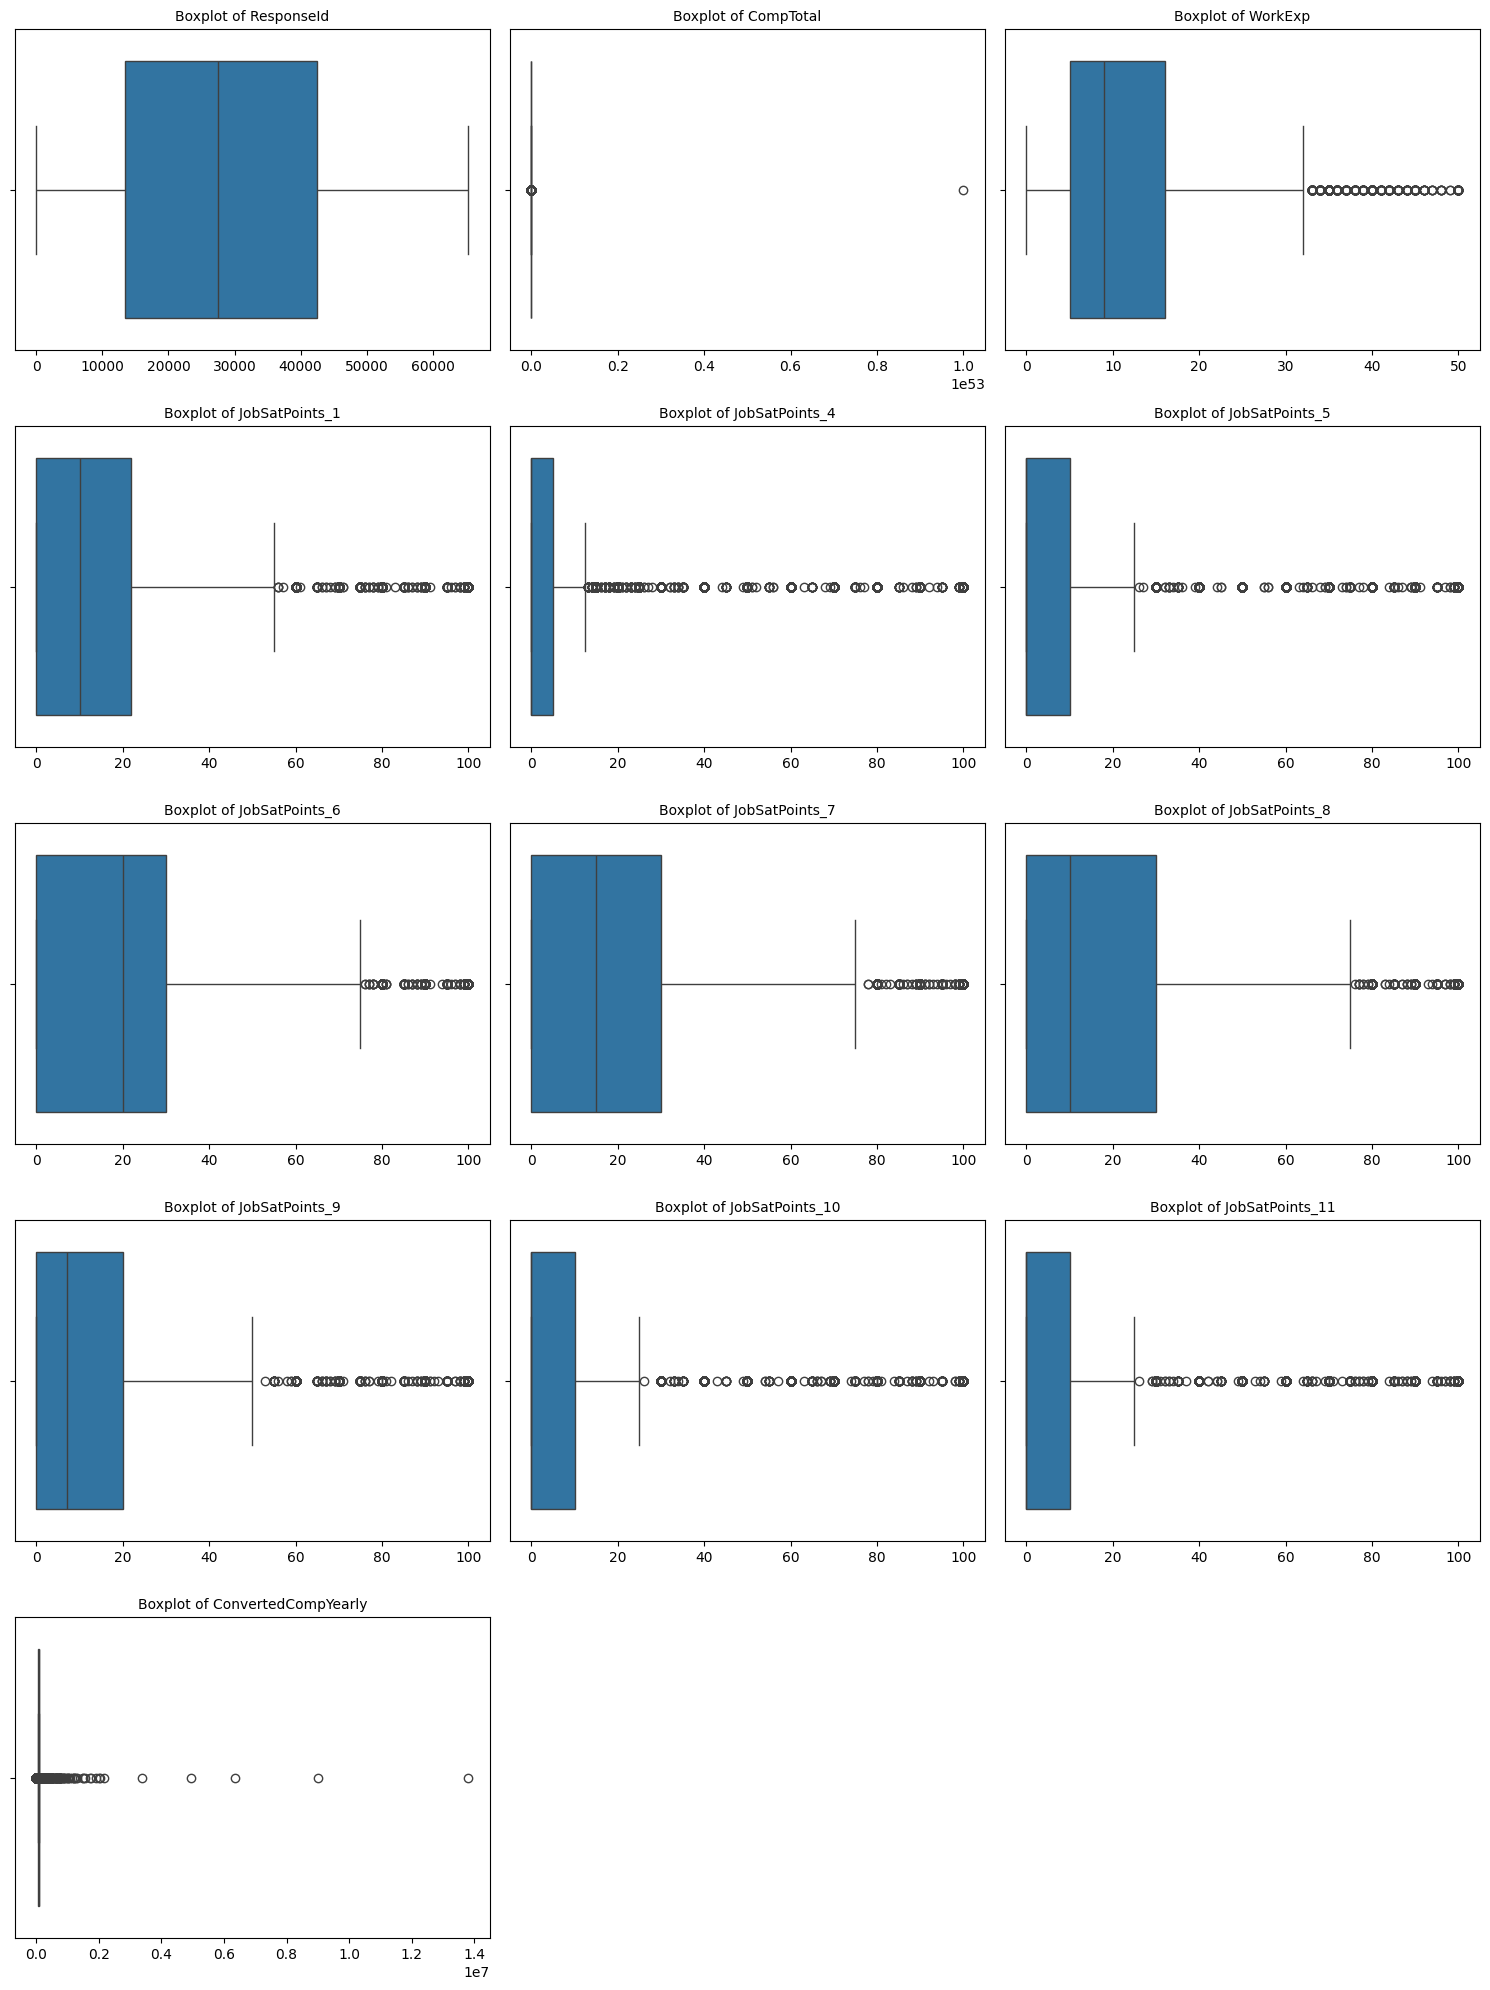

In [621]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns for outlier detection
numerical_columns = train_features.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display per row
columns_per_row = 3
# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.boxplot(x=train_features[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


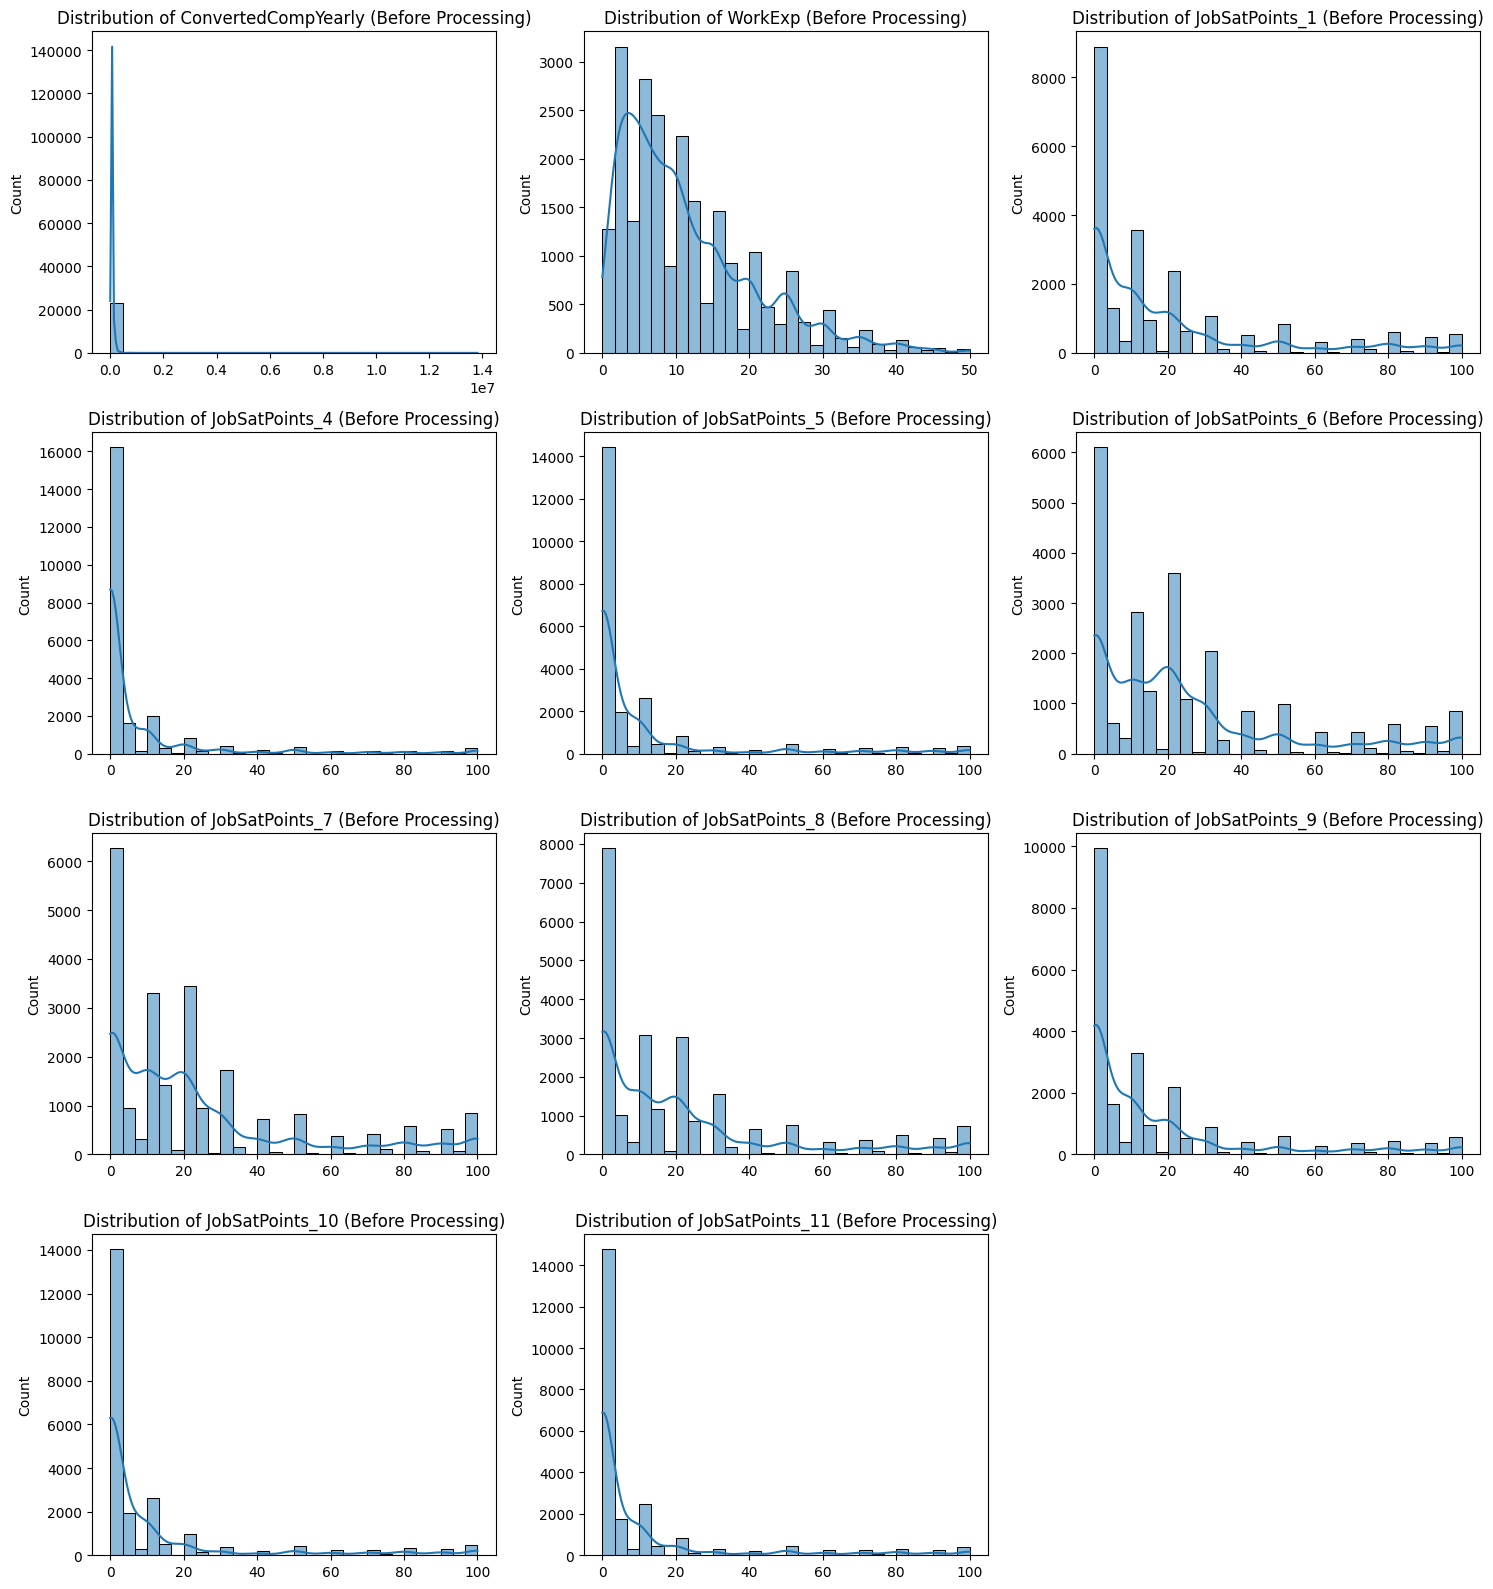

In [622]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define columns with potential outliers
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]

# Visualize the distributions of the features before any transformations or outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Before Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


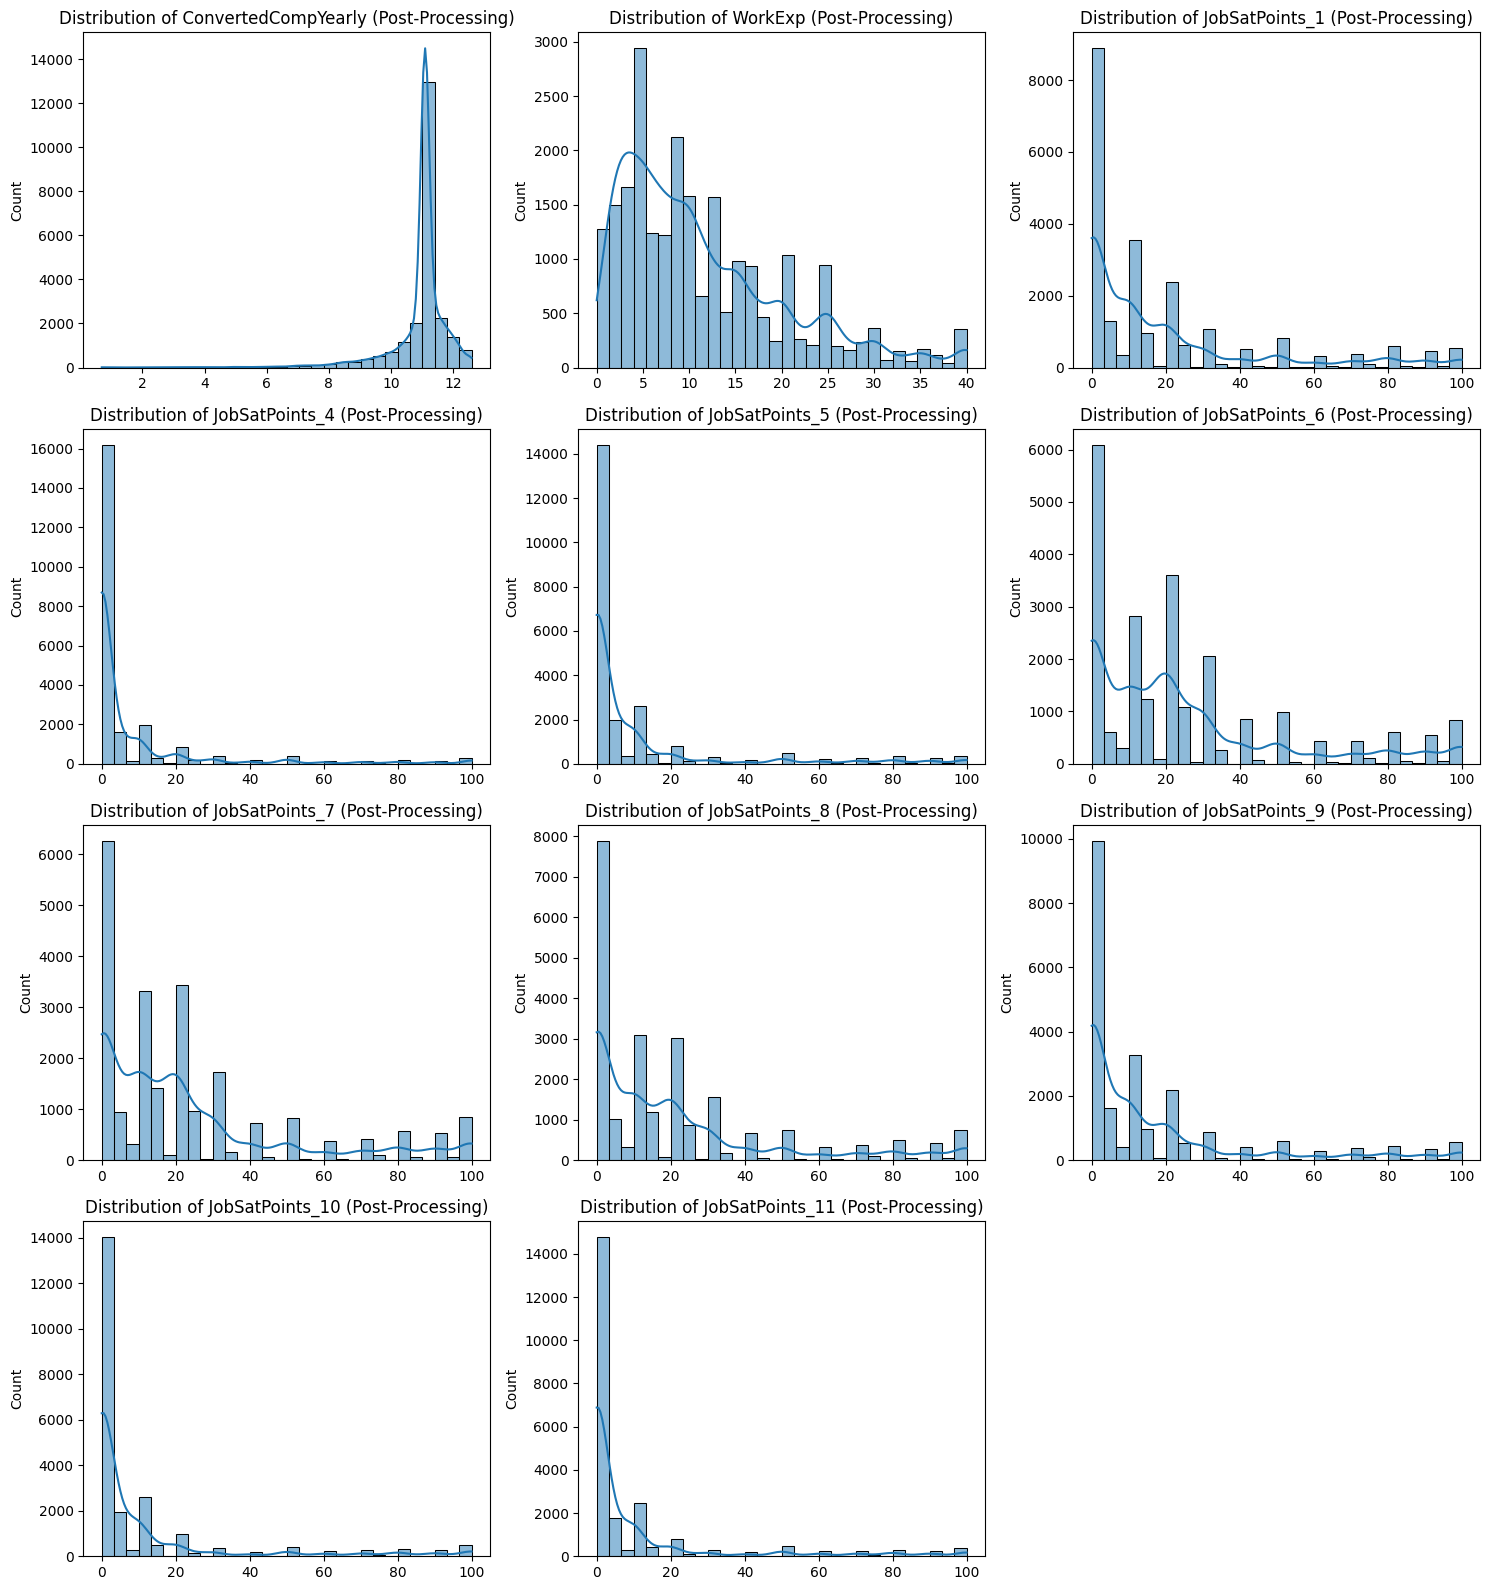

In [623]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Handle NaN values first (if any) in the relevant columns before transformation
train_features['ConvertedCompYearly'] = train_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN
test_features['ConvertedCompYearly'] = test_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN

# Check for negative values in 'ConvertedCompYearly' before applying log transformation
if (train_features['ConvertedCompYearly'] < 0).any() or (test_features['ConvertedCompYearly'] < 0).any():
    raise ValueError("Negative values found in 'ConvertedCompYearly', which cannot be log-transformed directly.")

# Apply log transformation to 'ConvertedCompYearly' to reduce skewness
train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# Define columns with potential outliers and set the 99th percentile cap using training data
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]
cap_values = {col: train_features[col].quantile(0.99) for col in outlier_columns}

# Apply the cap values to both training and test sets for consistency
for col in outlier_columns:
    cap_value = cap_values[col]
    train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
    test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# Visualize the adjusted distributions to confirm outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Post-Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


In [624]:
# # Import numpy for the log transformation
# import numpy as np

# # Apply log transformation to 'ConvertedCompYearly' to reduce skewness
# train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
# test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# # Define the 99th percentile cap for 'WorkExp' and 'JobSatPoints_*' columns in the training data
# for col in ['WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]:
#     cap_value = train_features[col].quantile(0.99)
#     train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
#     test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# # Visualize the adjusted distributions to confirm outlier handling
# plt.figure(figsize=(15, 2 * len(outlier_columns)))
# for i, col in enumerate(outlier_columns, 1):
#     plt.subplot(len(outlier_columns), 1, i)
#     sns.histplot(train_features[col].dropna(), kde=True, bins=30)
#     plt.title(f'Distribution of {col} (Post-Processing)')
# plt.tight_layout()
# plt.show()


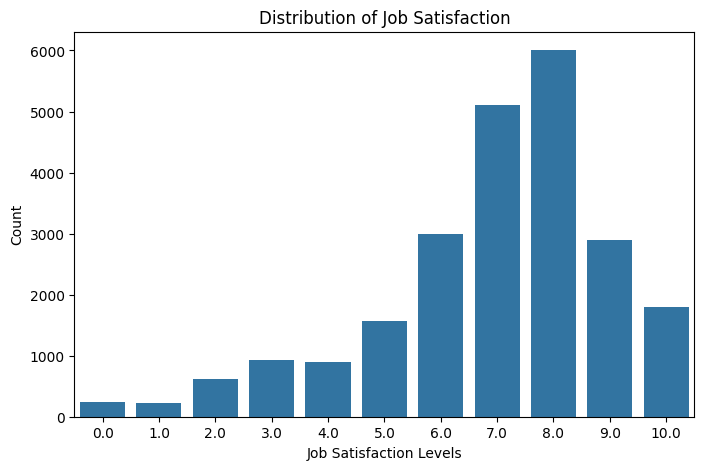

In [625]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable `JobSat` to understand class balance
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['JobSat'])
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Count")
plt.show()


In [626]:
# # Define a mapping function for job satisfaction levels to new classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into the new classes
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution
# print("New Class Distribution in Training Set:")
# print(train_data['JobSat_Class'].value_counts())
# print("\nNew Class Distribution in Test Set:")
# print(test_data['JobSat_Class'].value_counts())

# # Update target variable for model training
# y_train = train_data['JobSat_Class']
# y_test = test_data['JobSat_Class']

# # Drop original JobSat column to avoid confusion
# train_data = train_data.drop(columns=['JobSat'])
# test_data = test_data.drop(columns=['JobSat'])


In [627]:
# from sklearn.utils.class_weight import compute_class_weight

# # Define a mapping function for job satisfaction levels to new classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into the new classes
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution
# print("New Class Distribution in Training Set:")
# print(train_data['JobSat_Class'].value_counts())
# print("\nNew Class Distribution in Test Set:")
# print(test_data['JobSat_Class'].value_counts())

# # Update target variable for model training
# y_train = train_data['JobSat_Class']
# y_test = test_data['JobSat_Class']

# # Drop original JobSat column to avoid confusion
# train_data = train_data.drop(columns=['JobSat'])
# test_data = test_data.drop(columns=['JobSat'])

# # Compute class weights for imbalanced classes
# class_weights = compute_class_weight(
#     class_weight='balanced', 
#     classes=np.unique(y_train), 
#     y=y_train
# )

# # Convert the result into a dictionary
# class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# # Now, you can pass `class_weight` when fitting the model
# print("Class weights:", class_weight_dict)

# # Example of training the model with class weights
# # model.fit(X_train, y_train, class_weight=class_weight_dict)


In [628]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal_use,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently_Using,AIToolInterested_in_Using,AIToolNot_interested_in_Using,AINextMuch_more_integrated,AINextNo_change,AINextMore_integrated,AINextLess_integrated,AINextMuch_less_integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,11,9,"Developer, full-stack",2 to 9 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Reputation for quality and excellence;Con...,Netherlands,EUR European Euro,111000.0,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,MariaDB;MongoDB;MySQL,MongoDB;Redis,MongoDB,Digital Ocean;Firebase,Digital Ocean;Firebase;Vercel,Digital Ocean;Firebase,Angular;Laravel;Node.js;React;Symfony;Vue.js;W...,Angular;Astro;Htmx;Node.js;React;Svelte;Symfon...,Angular;Node.js;React;Symfony;Vue.js,Arduino;CMake,Arduino;cppunit;Rasberry Pi,Arduino,Capacitor;Cordova;Electron;Ionic;OpenGL,CUDA;DirectX;Electron;Flutter;OpenGL;React Nat...,Electron;OpenGL,APT;Bun;Composer;Docker;Gradle;Make;npm;Unity ...,APT;Composer;Make;Unity 3D;Vite,APT;Composer;Make;Unity 3D;Vite,Android Studio;IntelliJ IDEA;PhpStorm;Sublime ...,Jupyter Notebook/JupyterLab;Sublime Text;Vim;V...,Sublime Text;Visual Studio Code,Android;MacOS;Ubuntu,Android;iOS;MacOS;Ubuntu,Jira;Markdown File;Monday.com;Notion;Trello;Wikis,Jira;Markdown File,Jira;Markdown File,Discord;Google Meet;Slack;Whatsapp;Zoom,Google Meet;Slack,Google Meet;Slack,ChatGPT;GitHub Copilot;WolframAlpha,ChatGPT;GitHub Copilot;Google Gemini;WolframAlpha,ChatGPT;GitHub Copilot;WolframAlpha,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase;Documenting code;Tes...,Project planning;Committing and revi

In [629]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Define a mapping function for job satisfaction levels to new classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into the new classes
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution
# print("New Class Distribution in Training Set:")
# print(train_data['JobSat_Class'].value_counts())
# print("\nNew Class Distribution in Test Set:")
# print(test_data['JobSat_Class'].value_counts())

# # Update target variable for model training
# y_train = train_data['JobSat_Class']
# y_test = test_data['JobSat_Class']

# # Drop original JobSat column to avoid confusion
# train_data = train_data.drop(columns=['JobSat'])
# test_data = test_data.drop(columns=['JobSat'])

# # Compute class weights for imbalanced classes
# class_weights = compute_class_weight(
#     class_weight='balanced', 
#     classes=np.unique(y_train), 
#     y=y_train
# )

# # Convert the result into a dictionary
# class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# # Optional: Adjust class weights manually if needed, for example
# # If Class 0 is overrepresented, reduce its weight, or increase the weights of Class 1 and 2
# adjusted_class_weight_dict = {
#     0: class_weight_dict[0] * 0.8,  # Decrease weight for the majority class
#     1: class_weight_dict[1] * 1.2,  # Increase weight for moderate class
#     2: class_weight_dict[2] * 1.3   # Increase weight for the minority class
# }

# # Normalize class weights if desired (to make sure the sum of weights is 1, for example)
# total_weight = sum(adjusted_class_weight_dict.values())
# normalized_class_weight_dict = {k: v / total_weight for k, v in adjusted_class_weight_dict.items()}

# # Print final adjusted and normalized class weights
# print("Adjusted and normalized class weights:", normalized_class_weight_dict)

# # Now, you can pass `class_weight` when fitting the model
# # Example of training the model with class weights
# # model.fit(X_train, y_train, class_weight=normalized_class_weight_dict)


In [630]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Define a mapping function for job satisfaction levels to new classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into the new classes
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution
# print("New Class Distribution in Training Set:")
# print(train_data['JobSat_Class'].value_counts())
# print("\nNew Class Distribution in Test Set:")
# print(test_data['JobSat_Class'].value_counts())

# # Update target variable for model training
# y_train = train_data['JobSat_Class']
# y_test = test_data['JobSat_Class']

# # Drop original JobSat column to avoid confusion
# train_data = train_data.drop(columns=['JobSat'])
# test_data = test_data.drop(columns=['JobSat'])

# # Compute class weights for imbalanced classes
# class_weights = compute_class_weight(
#     class_weight='balanced', 
#     classes=np.unique(y_train), 
#     y=y_train
# )

# # Convert the result into a dictionary
# class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# # Adjust class weights manually (try different values to improve balance)
# adjusted_class_weight_dict = {
#     0: class_weight_dict[0] * 0.5,  # Further reduce the majority class
#     1: class_weight_dict[1] * 1.6,  # Slight increase for the moderate class
#     2: class_weight_dict[2] * 2.0   # Larger increase for the minority class
# }

# # Normalize class weights if desired (to make sure the sum of weights is 1, for example)
# total_weight = sum(adjusted_class_weight_dict.values())
# normalized_class_weight_dict = {k: v / total_weight for k, v in adjusted_class_weight_dict.items()}

# # Print final adjusted and normalized class weights
# print("Adjusted and normalized class weights:", normalized_class_weight_dict)

# # Now, you can pass `class_weight` when fitting the model
# # Example of training the model with class weights
# # model.fit(X_train, y_train, class_weight=normalized_class_weight_dict)


In [631]:
# # Re-apply the mapping function to correctly transform `JobSat` into the three classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into `JobSat_Class`
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution and data type
# print("JobSat_Class in Training Set:\n", train_data['JobSat_Class'].value_counts())
# print("Data type of JobSat_Class:", train_data['JobSat_Class'].dtype)


In [632]:
# train_data['JobSat_Class']

In [633]:
# train_data.shape

In [634]:
# Check for missing values across all columns in the training and test datasets after processing
missing_values_train = train_features.isnull().sum()
missing_values_test = test_features.isnull().sum()

# Display columns with missing values in the training and test datasets
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_test = missing_values_test[missing_values_test > 0]

missing_values_train, missing_values_test


(Series([], dtype: int64), Series([], dtype: int64))

In [635]:
import pandas as pd

# Assuming train_data and test_data are already defined as per the user's code

# Combine train and test data into a single DataFrame with an indicator for train/test split
train_data['Dataset'] = 'train'
test_data['Dataset'] = 'test'

# Concatenate both dataframes
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save to a single CSV file
combined_data.to_csv("combined_train_test.csv", index=False)



In [636]:
# from sklearn.preprocessing import StandardScaler

# # Identify numerical columns for normalization
# numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both training and test data
# train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
# test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# # Verify normalization results by checking the first few rows of the transformed data
# print(train_data[numerical_columns].head())
# print(test_data[numerical_columns].head())


In [637]:
# from sklearn.preprocessing import StandardScaler

# # Identify numerical columns for normalization, excluding the target column
# numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.drop('JobSat_Class')

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both training and test data
# train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
# test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# # Verify normalization results by checking the first few rows of the transformed data
# print(train_data[numerical_columns].head())
# print(test_data[numerical_columns].head())


In [638]:
from sklearn.utils.class_weight import compute_class_weight

# Function to map job satisfaction to new classes
def map_job_satisfaction(value):
    if value >= 0 and value <= 4:
        return 0  # Low Satisfaction
    elif value >= 5 and value <= 7:
        return 1  # Moderate Satisfaction
    elif value >= 8 and value <= 10:
        return 2  # High Satisfaction

# Apply the mapping to transform `JobSat` into the new classes
train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# Confirm the new class distribution
print("New Class Distribution in Training Set:")
print(train_data['JobSat_Class'].value_counts())
print("\nNew Class Distribution in Test Set:")
print(test_data['JobSat_Class'].value_counts())

# Update target variable for model training
y_train = train_data['JobSat_Class']
y_test = test_data['JobSat_Class']

# Drop original JobSat column to avoid confusion
train_data = train_data.drop(columns=['JobSat'])
test_data = test_data.drop(columns=['JobSat'])

# Compute class weights for imbalanced classes
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)

# Convert the result into a dictionary
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Adjust class weights manually (try different values to improve balance)
adjusted_class_weight_dict = {
    0: class_weight_dict[0] * 0.5,  # Further reduce the majority class
    1: class_weight_dict[1] * 1.6,  # Slight increase for the moderate class
    2: class_weight_dict[2] * 2.0   # Larger increase for the minority class
}

# Normalize class weights if desired (to make sure the sum of weights is 1, for example)
total_weight = sum(adjusted_class_weight_dict.values())
normalized_class_weight_dict = {k: v / total_weight for k, v in adjusted_class_weight_dict.items()}

# Print final adjusted and normalized class weights
print("Adjusted and normalized class weights:", normalized_class_weight_dict)


New Class Distribution in Training Set:
JobSat_Class
2    10709
1     9668
0     2923
Name: count, dtype: int64

New Class Distribution in Test Set:
JobSat_Class
2    2677
1    2418
0     731
Name: count, dtype: int64
Adjusted and normalized class weights: {0: 0.3268751201314374, 1: 0.316245254826377, 2: 0.3568796250421856}


In [639]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns from both train and test sets
columns_to_drop = ['ResponseId', 'CompTotal']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Identify numerical columns for normalization, excluding the target column
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.drop('JobSat_Class')

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify normalization results by checking the first few rows of the transformed data
print(train_data[numerical_columns].head())
print(test_data[numerical_columns].head())


        WorkExp  JobSatPoints_1  JobSatPoints_4  JobSatPoints_5  \
16835 -0.162030        2.363619        3.346667       -0.463324   
40638 -0.708524       -0.337094       -0.088671       -0.098033   
39715  0.165867       -0.722910       -0.410734       -0.463324   
39649 -0.162030       -0.722910       -0.410734       -0.463324   
44832 -0.380628       -0.337094        0.662809       -0.463324   

       JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  \
16835        2.042237        0.991104       -0.021210       -0.657132   
40638       -0.578696       -0.527402       -0.441800       -0.296077   
39715        0.565655        0.991104       -0.403565       -0.657132   
39649        0.934800       -0.860732        1.125852       -0.657132   
44832       -0.357209       -0.305181       -0.021210        0.145213   

       JobSatPoints_10  JobSatPoints_11  ConvertedCompYearly  
16835        -0.480858        -0.459510            -0.081190  
40638        -0.087861        -0

In [640]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [641]:
import keras
print("Keras version:", keras.__version__)


Keras version: 3.6.0


In [642]:
train_data.JobSat_Class

16835    1
40638    1
39715    1
39649    2
44832    2
40549    1
54850    1
877      2
43031    1
38348    2
26977    2
21273    0
41952    1
8906     1
48184    1
1391     2
3732     2
27915    2
21752    2
22774    1
51768    2
31660    2
10994    1
56191    1
6052     0
18862    2
53395    2
31481    1
52927    2
12621    1
26298    2
1227     2
21401    2
25113    1
50999    2
11352    0
5024     2
22015    2
23247    0
7017     0
56173    0
1876     2
30180    1
40903    2
40093    0
4654     2
30563    2
9373     2
30881    1
45455    2
30854    2
56431    1
17395    1
14797    2
36469    1
12640    2
39154    1
29570    1
30983    2
274      1
18313    2
26382    1
36009    1
34053    2
17127    1
18308    1
34999    2
3523     2
4936     1
15899    2
42289    0
4095     1
4457     2
46626    1
2905     1
34013    1
15155    2
7528     2
56605    2
29599    2
45590    2
6929     1
42936    2
15690    2
2671     0
3211     1
40581    2
18214    1
22662    2
19840    2
53653    2

In [643]:
print("Available columns in train_data:", train_data.columns.tolist())


Available columns in train_data: ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWork

In [644]:
# multi_label_columns = [col.strip() for col in multi_label_columns]


In [645]:
# print("Multi-label columns identified:", multi_label_columns)


In [646]:
# train_data.columns = train_data.columns.str.strip()


In [647]:
# test_data.columns = test_data.columns.str.strip()


In [648]:
# print("Shape after concatenation:", concatenated.shape)


In [649]:
train_data.shape

(23300, 113)

In [650]:
train_data.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'Dataset', 'JobSat_Class'],
      dtype='object', length=113)

In [651]:
train_data.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal_use,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently_Using,AIToolInterested_in_Using,AIToolNot_interested_in_Using,AINextMuch_more_integrated,AINextNo_change,AINextMore_integrated,AINextLess_integrated,AINextMuch_less_integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,Dataset,JobSat_Class
16835,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,11,9,"Developer, full-stack",2 to 9 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Reputation for quality and excellence;Con...,Netherlands,EUR European Euro,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,MariaDB;MongoDB;MySQL,MongoDB;Redis,MongoDB,Digital Ocean;Firebase,Digital Ocean;Firebase;Vercel,Digital Ocean;Firebase,Angular;Laravel;Node.js;React;Symfony;Vue.js;W...,Angular;Astro;Htmx;Node.js;React;Svelte;Symfon...,Angular;Node.js;React;Symfony;Vue.js,Arduino;CMake,Arduino;cppunit;Rasberry Pi,Arduino,Capacitor;Cordova;Electron;Ionic;OpenGL,CUDA;DirectX;Electron;Flutter;OpenGL;React Nat...,Electron;OpenGL,APT;Bun;Composer;Docker;Gradle;Make;npm;Unity ...,APT;Composer;Make;Unity 3D;Vite,APT;Composer;Make;Unity 3D;Vite,Android Studio;IntelliJ IDEA;PhpStorm;Sublime ...,Jupyter Notebook/JupyterLab;Sublime Text;Vim;V...,Sublime Text;Visual Studio Code,Android;MacOS;Ubuntu,Android;iOS;MacOS;Ubuntu,Jira;Markdown File;Monday.com;Notion;Trello;Wikis,Jira;Markdown File,Jira;Markdown File,Discord;Google Meet;Slack;Whatsapp;Zoom,Google Meet;Slack,Google Meet;Slack,ChatGPT;GitHub Copilot;WolframAlpha,ChatGPT;GitHub Copilot;Google Gemini;WolframAlpha,ChatGPT;GitHub Copilot;WolframAlpha,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,"Good, but not great at handling complex tasks",Writing code;Debugging and getting help;Search...,Learning about a codebase;Documenting code;Tes...,Project planning;Committing and reviewing code...,Writing 

In [652]:
# List of categorical columns in the train_data
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Initialize lists to store multilabel and non-multilabel categorical columns
multilabel_columns = []
non_multilabel_columns = []

# Iterate over the categorical columns to check for semicolons
for col in categorical_columns:
    # Check if any value in the column contains a semicolon
    if train_data[col].str.contains(';').any():
        multilabel_columns.append(col)  # Add to multilabel columns
    else:
        non_multilabel_columns.append(col)  # Add to non-multilabel columns

# Print the results
print("Multilabel Columns:", multilabel_columns)
print("Non-multilabel Columns:", non_multilabel_columns)


Multilabel Columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'BuyNewTool', 'TechEndorse', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWork

In [653]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    return train_data, test_data, le


# Apply encoding on non-multilabel columns (for Label Encoding)
for col in non_multilabel_columns:
    train_data, test_data, le = encode_column(train_data, test_data, col)

# You can add code here to process multilabel columns using Embedding layers (as per your previous approach).

# Check that encoding was applied correctly
print(train_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [654]:
train_data.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal_use,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently_Using,AIToolInterested_in_Using,AIToolNot_interested_in_Using,AINextMuch_more_integrated,AINextNo_change,AINextMore_integrated,AINextLess_integrated,AINextMuch_less_integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,Dataset,JobSat_Class
16835,0,1,"Employed, full-time;Independent contractor, fr...",1,0,Hobby;Contribute to open-source projects,1,"Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,2,49,17,4,2,Start a free trial;Ask developers I know/work ...,0,APIs;Reputation for quality and excellence;Con...,104,37,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,MariaDB;MongoDB;MySQL,MongoDB;Redis,MongoDB,Digital Ocean;Firebase,Digital Ocean;Firebase;Vercel,Digital Ocean;Firebase,Angular;Laravel;Node.js;React;Symfony;Vue.js;W...,Angular;Astro;Htmx;Node.js;React;Svelte;Symfon...,Angular;Node.js;React;Symfony;Vue.js,Arduino;CMake,Arduino;cppunit;Rasberry Pi,Arduino,Capacitor;Cordova;Electron;Ionic;OpenGL,CUDA;DirectX;Electron;Flutter;OpenGL;React Nat...,Electron;OpenGL,APT;Bun;Composer;Docker;Gradle;Make;npm;Unity ...,APT;Composer;Make;Unity 3D;Vite,APT;Composer;Make;Unity 3D;Vite,Android Studio;IntelliJ IDEA;PhpStorm;Sublime ...,Jupyter Notebook/JupyterLab;Sublime Text;Vim;V...,Sublime Text;Visual Studio Code,Android;MacOS;Ubuntu,Android;iOS;MacOS;Ubuntu,Jira;Markdown File;Monday.com;Notion;Trello;Wikis,Jira;Markdown File,Jira;Markdown File,Discord;Google Meet;Slack;Whatsapp;Zoom,Google Meet;Slack,Google Meet;Slack,ChatGPT;GitHub Copilot;WolframAlpha,ChatGPT;GitHub Copilot;Google Gemini;WolframAlpha,ChatGPT;GitHub Copilot;WolframAlpha,Stack Overflow;Stack Exchange,4,2,4,Quickly finding code solutions;Finding reliabl...,5,2,4,Increase productivity;Greater efficiency;Speed...,4,1,Writing code;Debugging and getting help;Search...,Learning about a codebase;Documenting code;Tes...,Project planning;Committing and reviewing code...,Writing code;Debugging and getting help;Search...,Writing code,Writing code,Writing code,Writing code,2,Circulating misinformation or disinformation;M...,Lack of executive buy-in;We don’t have the rig...,0,0,-0.162030,1,4,1,0,0,0,3,2,1,2,0,0,2,0,Amount of technical debt;Complexity of tech st...,Developer portal or other central places to fi...,0,8,13,2.363619,3.346667,-0.463324,

In [655]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np

# # Define a mapping function for job satisfaction levels to new classes
# def map_job_satisfaction(value):
#     if value >= 0 and value <= 4:
#         return 0  # Low Satisfaction
#     elif value >= 5 and value <= 7:
#         return 1  # Moderate Satisfaction
#     elif value >= 8 and value <= 10:
#         return 2  # High Satisfaction

# # Apply the mapping to transform `JobSat` into the new classes
# train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
# test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# # Confirm the new class distribution
# print("New Class Distribution in Training Set:")
# print(train_data['JobSat_Class'].value_counts())
# print("\nNew Class Distribution in Test Set:")
# print(test_data['JobSat_Class'].value_counts())

# # Update target variable for model training
# y_train = train_data['JobSat_Class']
# y_test = test_data['JobSat_Class']

# # Drop original JobSat column to avoid confusion
# train_data = train_data.drop(columns=['JobSat'])
# test_data = test_data.drop(columns=['JobSat'])

# # Compute class weights for imbalanced classes
# class_weights = compute_class_weight(
#     class_weight='balanced', 
#     classes=np.unique(y_train), 
#     y=y_train
# )

# # Convert the result into a dictionary
# class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# # Adjust class weights manually (try different values to improve balance)
# adjusted_class_weight_dict = {
#     0: class_weight_dict[0] * 0.5,  # Further reduce the majority class
#     1: class_weight_dict[1] * 1.6,  # Slight increase for the moderate class
#     2: class_weight_dict[2] * 2.0   # Larger increase for the minority class
# }

# # Normalize class weights if desired (to make sure the sum of weights is 1, for example)
# total_weight = sum(adjusted_class_weight_dict.values())
# normalized_class_weight_dict = {k: v / total_weight for k, v in adjusted_class_weight_dict.items()}

# # Print final adjusted and normalized class weights
# print("Adjusted and normalized class weights:", normalized_class_weight_dict)

# # Now, you can pass `class_weight` when fitting the model
# # Example of training the model with class weights
# # model.fit(X_train, y_train, class_weight=normalized_class_weight_dict)


In [656]:
from collections import Counter

# Check for duplicates in multilabel_columns
multilabel_column_counts = Counter(multilabel_columns)

# Print any duplicate columns
duplicates = {col: count for col, count in multilabel_column_counts.items() if count > 1}
print(f"Duplicate columns: {duplicates}")


Duplicate columns: {}


In [657]:
# Remove duplicates from multilabel_columns
multilabel_columns = list(set(multilabel_columns))

# Check that duplicates have been removed
multilabel_column_counts = Counter(multilabel_columns)
print(f"Multilabel columns after removing duplicates: {multilabel_columns}")


Multilabel columns after removing duplicates: ['AIToolNot_interested_in_Using', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackAsyncAdmired', 'OfficeStackAsyncWantToWorkWith', 'ProfessionalTech', 'PlatformHaveWorkedWith', 'CodingActivities', 'AINextMuch_more_integrated', 'LanguageWantToWorkWith', 'WebframeHaveWorkedWith', 'EmbeddedAdmired', 'AISearchDevHaveWorkedWith', 'PlatformAdmired', 'EmbeddedHaveWorkedWith', 'AIToolCurrently_Using', 'DatabaseWantToWorkWith', 'NEWCollabToolsAdmired', 'OfficeStackSyncAdmired', 'AIChallenges', 'MiscTechAdmired', 'AINextMuch_less_integrated', 'AIEthics', 'Frustration', 'TechDoc', 'AISearchDevWantToWorkWith', 'ToolsTechHaveWorkedWith', 'PlatformWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'Employment', 'BuyNewTool', 'OpSysProfessional_use', 'AINextLess_integrated', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'WebframeAdmired', 'DatabaseHaveWorkedWith', 'LanguageHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchDevAdmire

In [658]:
print("Train Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)


Train Data Columns: Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'Dataset', 'JobSat_Class'],
      dtype='object', length=113)
Test Data Columns: Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'Dataset', 'JobSat_Class'],
      dtype='object', length=113)


In [659]:
X_train = [train_data[col] for col in multilabel_columns if col in train_data.columns]
X_test = [test_data[col] for col in multilabel_columns if col in test_data.columns]


In [660]:
X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]


In [661]:
print("Columns in X_train:", [col for col in multilabel_columns] + [col for col in non_multilabel_columns])


Columns in X_train: ['AIToolNot_interested_in_Using', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackAsyncAdmired', 'OfficeStackAsyncWantToWorkWith', 'ProfessionalTech', 'PlatformHaveWorkedWith', 'CodingActivities', 'AINextMuch_more_integrated', 'LanguageWantToWorkWith', 'WebframeHaveWorkedWith', 'EmbeddedAdmired', 'AISearchDevHaveWorkedWith', 'PlatformAdmired', 'EmbeddedHaveWorkedWith', 'AIToolCurrently_Using', 'DatabaseWantToWorkWith', 'NEWCollabToolsAdmired', 'OfficeStackSyncAdmired', 'AIChallenges', 'MiscTechAdmired', 'AINextMuch_less_integrated', 'AIEthics', 'Frustration', 'TechDoc', 'AISearchDevWantToWorkWith', 'ToolsTechHaveWorkedWith', 'PlatformWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'Employment', 'BuyNewTool', 'OpSysProfessional_use', 'AINextLess_integrated', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'WebframeAdmired', 'DatabaseHaveWorkedWith', 'LanguageHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchDevAdmired', 'EmbeddedWantToWorkWit

In [662]:
# Ensure there are no duplicates in the list of columns
unique_columns = list(set(multilabel_columns + non_multilabel_columns))

# Now prepare the X_train and X_test without duplicate columns
X_train = [train_data[col] for col in unique_columns if col in train_data.columns]
X_test = [test_data[col] for col in unique_columns if col in test_data.columns]


In [663]:
# Check if any required columns are missing from the train or test data
missing_train_columns = [col for col in unique_columns if col not in train_data.columns]
missing_test_columns = [col for col in unique_columns if col not in test_data.columns]

if missing_train_columns:
    print(f"Missing columns in train data: {missing_train_columns}")
if missing_test_columns:
    print(f"Missing columns in test data: {missing_test_columns}")


In [664]:
# Correct use of iloc to access by index position
train_data.iloc[0]  # First row

# Correct use of loc to access by column name
train_data.loc[:, 'JobSat_Class']  # Accessing column by name


16835    1
40638    1
39715    1
39649    2
44832    2
40549    1
54850    1
877      2
43031    1
38348    2
26977    2
21273    0
41952    1
8906     1
48184    1
1391     2
3732     2
27915    2
21752    2
22774    1
51768    2
31660    2
10994    1
56191    1
6052     0
18862    2
53395    2
31481    1
52927    2
12621    1
26298    2
1227     2
21401    2
25113    1
50999    2
11352    0
5024     2
22015    2
23247    0
7017     0
56173    0
1876     2
30180    1
40903    2
40093    0
4654     2
30563    2
9373     2
30881    1
45455    2
30854    2
56431    1
17395    1
14797    2
36469    1
12640    2
39154    1
29570    1
30983    2
274      1
18313    2
26382    1
36009    1
34053    2
17127    1
18308    1
34999    2
3523     2
4936     1
15899    2
42289    0
4095     1
4457     2
46626    1
2905     1
34013    1
15155    2
7528     2
56605    2
29599    2
45590    2
6929     1
42936    2
15690    2
2671     0
3211     1
40581    2
18214    1
22662    2
19840    2
53653    2

In [665]:
print(len(train_data.columns))  # To see all the column names in the training data
print(len(test_data.columns))   # To see all the column names in the test data


113
113


In [666]:
print(train_data.columns)
print(test_data.columns)


Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'Dataset', 'JobSat_Class'],
      dtype='object', length=113)
Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'Dataset', 'JobSat_Class'],
      dtype='object', length=113)


In [667]:
print(train_data.head())
print(test_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [668]:
print(train_data.columns.tolist())
print(test_data.columns.tolist())


['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired',

In [669]:
# Check the shape of individual arrays in X_train
print("Shape of first item in X_train:", np.array(X_train[0]).shape)
print("Shape of first item in X_test:", np.array(X_test[0]).shape)

# Print the length of X_train and X_test
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))


Shape of first item in X_train: (23300,)
Shape of first item in X_test: (5826,)
Length of X_train: 101
Length of X_test: 101


In [670]:
X_train_combined = np.column_stack(X_train)
X_test_combined = np.column_stack(X_test)

print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_combined:", X_test_combined.shape)


Shape of X_train_combined: (23300, 101)
Shape of X_test_combined: (5826, 101)


In [671]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


Unique values in y_train: [1 2 0]
Unique values in y_test: [2 0 1]


In [672]:
print("Class distribution in y_train:\n", y_train.value_counts())
print("Class distribution in y_test:\n", y_test.value_counts())


Class distribution in y_train:
 JobSat_Class
2    10709
1     9668
0     2923
Name: count, dtype: int64
Class distribution in y_test:
 JobSat_Class
2    2677
1    2418
0     731
Name: count, dtype: int64


In [673]:
print("Class weights:", normalized_class_weight_dict)


Class weights: {0: 0.3268751201314374, 1: 0.316245254826377, 2: 0.3568796250421856}


In [674]:
print("Unique classes in y_train:", y_train.unique())
print("Unique classes in y_test:", y_test.unique())


Unique classes in y_train: [1 2 0]
Unique classes in y_test: [2 0 1]


In [675]:
# After preparing the data and ensuring the labels are correctly set
print(f"Shape of X_train: {len(X_train)}")
print(f"Shape of X_test: {len(X_test)}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check the model architecture before training
final_trained_model.summary()


Shape of X_train: 101
Shape of X_test: 101
Shape of y_train: (23300,)
Shape of y_test: (5826,)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ CodingActivities    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LearnCode           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LearnCodeOnline     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TechDoc             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BuyNewTool          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TechEndorse         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageHaveWorked… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageWantToWork… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LanguageAdmired     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseHaveWorked… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseWantToWork… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DatabaseAdmired     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformHaveWorked… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformWantToWork… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PlatformAdmired     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WebframeHaveWorked… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ WebframeWantToWork… │ (None, 1)         │          0 │ -               

 Total params: 9,035,147 (34.47 MB)

 Trainable params: 3,011,715 (11.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,023,432 (22.98 MB)

In [676]:
# Ensure that the features are correctly structured for the model input
X_train = [train_data[col].values for col in multilabel_columns] + [train_data[col].values for col in non_multilabel_columns]
X_test = [test_data[col].values for col in multilabel_columns] + [test_data[col].values for col in non_multilabel_columns]

# Print the shapes to ensure correctness
print(f"Shape of X_train (features): {[X.shape for X in X_train]}")  # Each should be of shape (n_samples, 1)
print(f"Shape of X_test (features): {[X.shape for X in X_test]}")  # Each should be of shape (n_samples, 1)


Shape of X_train (features): [(23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), (23300,), 

In [ ]:
print(np.unique(y_train))  # Should print [0, 1, 2]
print(np.unique(y_test))   # Should print [0, 1, 2]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Function to map job satisfaction to new classes
def map_job_satisfaction(value):
    if value >= 0 and value <= 4:
        return 0  # Low Satisfaction
    elif value >= 5 and value <= 7:
        return 1  # Moderate Satisfaction
    elif value >= 8 and value <= 10:
        return 2  # High Satisfaction

# Apply the mapping to transform `JobSat` into the new classes
train_data['JobSat_Class'] = train_data['JobSat'].apply(map_job_satisfaction)
test_data['JobSat_Class'] = test_data['JobSat'].apply(map_job_satisfaction)

# Confirm the new class distribution
print("New Class Distribution in Training Set:")
print(train_data['JobSat_Class'].value_counts())
print("\nNew Class Distribution in Test Set:")
print(test_data['JobSat_Class'].value_counts())

# Update target variable for model training
y_train = train_data['JobSat_Class']
y_test = test_data['JobSat_Class']

# Drop original JobSat column to avoid confusion
train_data = train_data.drop(columns=['JobSat'])
test_data = test_data.drop(columns=['JobSat'])

# Compute class weights for imbalanced classes
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)

# Convert the result into a dictionary
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Adjust class weights manually (try different values to improve balance)
adjusted_class_weight_dict = {
    0: class_weight_dict[0] * 0.5,  # Further reduce the majority class
    1: class_weight_dict[1] * 1.6,  # Slight increase for the moderate class
    2: class_weight_dict[2] * 2.0   # Larger increase for the minority class
}

# Normalize class weights if desired (to make sure the sum of weights is 1, for example)
total_weight = sum(adjusted_class_weight_dict.values())
normalized_class_weight_dict = {k: v / total_weight for k, v in adjusted_class_weight_dict.items()}

# Print final adjusted and normalized class weights
print("Adjusted and normalized class weights:", normalized_class_weight_dict)


In [678]:
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim, name):
    return Embedding(input_dim=input_dim, output_dim=output_dim, name=name)

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column, label_encoders):
    le = LabelEncoder()
    
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data to account for unseen labels in test set
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    # Store the encoder for potential inverse transformation
    label_encoders[column] = le

    return train_data, test_data

# Final model training function
def final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim, class_weights):
    # Initialize a dictionary to store label encoders
    label_encoders = {}

    # Convert categorical columns to numeric using Label Encoding for multilabel columns
    for col in multilabel_columns:
        train_data, test_data = encode_column(train_data, test_data, col, label_encoders)

    # Ensure that the columns exist in the train_data and test_data before passing to the model
    for col in multilabel_columns + non_multilabel_columns:
        if col not in train_data.columns:
            raise ValueError(f"Column '{col}' not found in train_data.")
        if col not in test_data.columns:
            raise ValueError(f"Column '{col}' not found in test_data.")

    # Prepare data for training (convert to numpy arrays)
    # X_train = np.column_stack([train_data[col].values for col in multilabel_columns + non_multilabel_columns])
    # X_test = np.column_stack([test_data[col].values for col in multilabel_columns + non_multilabel_columns])

    X_train = np.array([train_data[col].values for col in multilabel_columns + non_multilabel_columns]).T
    X_test = np.array([test_data[col].values for col in multilabel_columns + non_multilabel_columns]).T

    y_train = train_data['JobSat_Class']
    y_test = test_data['JobSat_Class']

    # Define the input for multilabel columns and embedding layers
    multilabel_inputs = []
    embedding_layers = []

    for col in multilabel_columns:
        input_layer = Input(shape=(1,), name=f"{col}_input")
        embedding_layer = create_embedding_layer(input_dim=len(label_encoders[col].classes_), 
                                                 output_dim=embedding_dim, 
                                                 name=f"{col}_embedding")(input_layer)
        flattened_embedding = Flatten()(embedding_layer)
        multilabel_inputs.append(input_layer)
        embedding_layers.append(flattened_embedding)

    # Define the input for non-multilabel columns
    non_multilabel_inputs = []
    for col in non_multilabel_columns:
        input_layer = Input(shape=(1,), name=col)
        non_multilabel_inputs.append(input_layer)

    # Concatenate multilabel embeddings with non-multilabel features
    combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

    # Define the rest of the model
    x = Dense(128, activation='relu')(combined_features)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)

    # Build and compile the model
    model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        class_weight=class_weights,  # Apply class weights here
        verbose=1
    )

    return model, history

# Example usage:
embedding_dim = 16
final_trained_model, final_training_history = final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim, normalized_class_weight_dict)
final_trained_model.summary()  # Optionally, display the model summary to check the architecture


KeyError: 0

In [679]:
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim, name):
    return Embedding(input_dim=input_dim, output_dim=output_dim, name=name)

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column, label_encoders):
    le = LabelEncoder()
    
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data to account for unseen labels in test set
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    # Store the encoder for potential inverse transformation
    label_encoders[column] = le

    return train_data, test_data

# Final model training function
def final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim, class_weights):
    # Initialize a dictionary to store label encoders
    label_encoders = {}

    # Convert categorical columns to numeric using Label Encoding for multilabel columns
    for col in multilabel_columns:
        train_data, test_data = encode_column(train_data, test_data, col, label_encoders)

    # Define the input for multilabel columns and embedding layers
    multilabel_inputs = []
    embedding_layers = []

    for col in multilabel_columns:
        # Use a unique name for each input layer based on the column name
        input_layer = Input(shape=(1,), name=f"{col}_input")  # No need to pass train_data[col] here
        embedding_layer = create_embedding_layer(input_dim=len(label_encoders[col].classes_), 
                                                 output_dim=embedding_dim, 
                                                 name=f"{col}_embedding")(input_layer)
        flattened_embedding = Flatten()(embedding_layer)
        multilabel_inputs.append(input_layer)
        embedding_layers.append(flattened_embedding)

    # Define the input for non-multilabel columns
    non_multilabel_inputs = []
    for col in non_multilabel_columns:
        input_layer = Input(shape=(1,), name=col)
        non_multilabel_inputs.append(input_layer)

    # Concatenate multilabel embeddings with non-multilabel features
    combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

    # Define the rest of the model
    x = Dense(128, activation='relu')(combined_features)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)  # Assuming 3 classes for JobSat_Class

    # Build and compile the model
    model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Prepare data for training
    X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
    X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

    y_train = train_data['JobSat_Class']
    y_test = test_data['JobSat_Class']

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        class_weight=class_weights,  # Apply class weights here
        verbose=1
    )

    # Return the trained model and the training history
    return model, history

# Example usage:
embedding_dim = 16  # Set to the best embedding dimension from previous experiments
final_trained_model, final_training_history = final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim, normalized_class_weight_dict)
final_trained_model.summary()  # Optionally, display the model summary to check the architecture


KeyError: 0

[0 1 2]
[0 1 2]


In [680]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim):
    return Embedding(input_dim=input_dim, output_dim=output_dim)

# Function to dynamically test different embedding dimensions
def dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns):
    # Initialize a dictionary to store LabelEncoders for each column
    label_encoders = {}
    
    # Encode multilabel columns (i.e., columns containing semicolons) using LabelEncoder
    for col in multilabel_columns:
        le = LabelEncoder()
        
        # Combine the train and test data to fit the encoder on both datasets
        all_data = pd.concat([train_data[col], test_data[col]], axis=0)
        le.fit(all_data)  # Fit on the combined data
        
        # Apply the encoder to both train and test data
        train_data[col] = le.transform(train_data[col])
        test_data[col] = le.transform(test_data[col])
        
        label_encoders[col] = le  # Store the encoder for potential inverse transformation

    # Define maximum number of categories for each multilabel column
    max_categories = {col: len(label_encoders[col].classes_) for col in multilabel_columns}
    best_embedding_dim = 5  # Default embedding dimension

    best_accuracy = 0
    embedding_dim_range = [4, 8, 16, 32, 64]  # Example values for embedding dimensions to search

    for embedding_dim in embedding_dim_range:
        print(f"Testing embedding dimension: {embedding_dim}")

        # Define the input for multilabel columns
        multilabel_inputs = []
        embedding_layers = []

        for col in multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            embedding_layer = create_embedding_layer(input_dim=max_categories[col], output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            multilabel_inputs.append(input_layer)
            embedding_layers.append(flattened_embedding)

        # Define the input for non-multilabel columns
        non_multilabel_inputs = []
        for col in non_multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            non_multilabel_inputs.append(input_layer)

        # Concatenate multilabel embeddings with non-multilabel features
        combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

        # Define the rest of the model
        x = Dense(128, activation='relu')(combined_features)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)

        # Build and compile the model
        model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Prepare data for training
        X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
        X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

        y_train = train_data['JobSat_Class']
        y_test = test_data['JobSat_Class']

        # Train the model
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_test, y_test),
            epochs=10,
            batch_size=32,
            verbose=0  # Set verbose to 0 for better performance during testing
        )

        # Evaluate the model and update best accuracy if needed
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy for embedding dimension {embedding_dim}: {val_accuracy:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_embedding_dim = embedding_dim
            print(f"New best embedding dimension: {best_embedding_dim} with accuracy {best_accuracy:.4f}")
    
    return best_embedding_dim

# Apply dynamic embedding search to find the best embedding dimension
best_embedding_dim = dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns)
print(f"The best embedding dimension is: {best_embedding_dim}")


Testing embedding dimension: 4


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['AIToolNot_interested_in_Using', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackAsyncAdmired', 'OfficeStackAsyncWantToWorkWith', 'ProfessionalTech', 'PlatformHaveWorkedWith', 'CodingActivities', 'AINextMuch_more_integrated', 'LanguageWantToWorkWith', 'WebframeHaveWorkedWith', 'EmbeddedAdmired', 'AISearchDevHaveWorkedWith', 'PlatformAdmired', 'EmbeddedHaveWorkedWith', 'AIToolCurrently_Using', 'DatabaseWantToWorkWith', 'NEWCollabToolsAdmired', 'OfficeStackSyncAdmired', 'AIChallenges', 'MiscTechAdmired', 'AINextMuch_less_integrated', 'AIEthics', 'Frustration', 'TechDoc', 'AISearchDevWantToWorkWith', 'ToolsTechHaveWorkedWith', 'PlatformWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'Employment', 'BuyNewTool', 'OpSysProfessional_use', 'AINextLess_integrated', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', '

KeyboardInterrupt: 

In [ ]:
print(f"Structure of X_train: {len(X_train)}")
print(f"Structure of X_test: {len(X_test)}")
print(f"Sample X_train: {X_train[:5]}")


In [692]:
# Example class weights array (adjust as needed)
class_weights_array = np.array([0.33, 0.33, 0.34])

# Convert the array to a dictionary with keys corresponding to class labels
class_weight_dict = {i: class_weights_array[i] for i in range(len(class_weights_array))}

print("Class Weight Dictionary:", class_weight_dict)


Class Weight Dictionary: {0: 0.33, 1: 0.33, 2: 0.34}


In [687]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim):
    return Embedding(input_dim=input_dim, output_dim=output_dim)  # Removed `input_length` since it's deprecated

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column, label_encoders):
    le = LabelEncoder()
    
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data to account for unseen labels in test set
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    # Store the encoder for potential inverse transformation
    label_encoders[column] = le

    return train_data, test_data

# Final model training function
def final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim):
    # Initialize a dictionary to store label encoders
    label_encoders = {}

    # Convert categorical columns to numeric using Label Encoding for multilabel columns
    for col in multilabel_columns:
        train_data, test_data = encode_column(train_data, test_data, col, label_encoders)

    # Define the input for multilabel columns and embedding layers
    multilabel_inputs = []
    embedding_layers = []

    for col in multilabel_columns:
        input_layer = Input(shape=(1,), name=col)
        embedding_layer = create_embedding_layer(input_dim=len(label_encoders[col].classes_), output_dim=embedding_dim)(input_layer)
        flattened_embedding = Flatten()(embedding_layer)
        multilabel_inputs.append(input_layer)
        embedding_layers.append(flattened_embedding)

    # Define the input for non-multilabel columns
    non_multilabel_inputs = []
    for col in non_multilabel_columns:
        input_layer = Input(shape=(1,), name=col)
        non_multilabel_inputs.append(input_layer)

    # Concatenate multilabel embeddings with non-multilabel features
    combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

    # Define the rest of the model
    x = Dense(128, activation='relu')(combined_features)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)  # Assuming 3 classes for JobSat_Class

    # Build and compile the model
    model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Prepare data for training
    X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
    X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

    y_train = train_data['JobSat_Class']
    y_test = test_data['JobSat_Class']

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        class_weight=class_weight_dict,
        verbose=1  # You can adjust the verbosity level based on your needs
    )

    # Return the trained model and the training history
    return model, history

# Example usage:
embedding_dim = 16  # Set to the best embedding dimension from previous experiments
final_trained_model, final_training_history = final_model(train_data, test_data, multilabel_columns, non_multilabel_columns, embedding_dim)
final_trained_model.summary()  # Optionally, display the model summary to check the architecture


KeyError: 0

In [ ]:

# Set maximum number of categories for each multilabel column
max_categories = {col: len(train_data[col].unique()) for col in multilabel_columns}

# Function to create embedding layers
def create_embedding_layer(input_dim, output_dim):
    return Embedding(input_dim=input_dim, output_dim=output_dim, input_length=1)

# Create embeddings for multilabel columns
multilabel_inputs = []
embedding_layers = []

for col in multilabel_columns:
    input_layer = Input(shape=(1,), name=col)
    embedding_layer = create_embedding_layer(input_dim=max_categories[col], output_dim=5)(input_layer)  # output_dim can be tuned
    flattened_embedding = Flatten()(embedding_layer)
    multilabel_inputs.append(input_layer)
    embedding_layers.append(flattened_embedding)

# Create input layers for non-multilabel columns
non_multilabel_inputs = []
for col in non_multilabel_columns:
    input_layer = Input(shape=(1,), name=col)
    non_multilabel_inputs.append(input_layer)

# Concatenate multilabel embeddings with non-multilabel features
combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

# Define the model
x = Dense(128, activation='relu')(combined_features)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output = Dense(len(train_data['JobSat_Class'].unique()), activation='softmax')(x)  # Adjusted to match number of classes in 'JobSat_Class'

# Build and compile the model
model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Preparing training and validation data
X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

y_train = train_data['JobSat_Class']
y_test = test_data['JobSat_Class']

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
)

# Evaluate the model (Optional)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separate features and target
X_train = train_data.drop(columns=['JobSat_Class'])
y_train = train_data['JobSat_Class']

# Set a threshold for high cardinality (e.g., more than 10 unique values)
high_cardinality_threshold = 10

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Dynamically identify high- and low-cardinality columns
high_cardinality_columns = [col for col in categorical_columns if X_train[col].nunique() > high_cardinality_threshold]
low_cardinality_columns = [col for col in categorical_columns if X_train[col].nunique() <= high_cardinality_threshold]

print("High-cardinality columns:", high_cardinality_columns)
print("Low-cardinality columns:", low_cardinality_columns)

# Apply Label Encoding for low-cardinality categorical columns
for col in low_cardinality_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))

# Apply Frequency Encoding for high-cardinality categorical columns
for col in high_cardinality_columns:
    freq_encoding = X_train[col].value_counts(normalize=True).to_dict()
    X_train[col] = X_train[col].map(freq_encoding)

# Confirm feature engineering and reduced dimensionality
print("Transformed Training Data:\n", X_train.head())

# Calculate class weights based on class distribution
class_weights = {0: 2.6570874672140494, 1: 0.8033374706936974, 2: 0.7252466772496654}

# Fit the Random Forest model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns)

top_n = min(100, len(X_train.columns))  # Set top_n to the number of available features
top_features = feature_importances.nlargest(top_n)
print(f"Top {top_n} Important Features:\n", top_features)



High-cardinality columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'BuyNewTool', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeS

In [ ]:
import pandas as pd

# Set pandas to display all rows and columns
pd.set_option('display.max_rows', None)  # This will display all rows
pd.set_option('display.max_columns', None)  # This will display all columns

# Now print the top features
print("Top 100 Important Features:\n", top_features)


Top 100 Important Features:
 Frustration                       0.019827
ProfessionalTech                  0.018385
LearnCode                         0.016893
Knowledge_8                       0.016731
ConvertedCompYearly               0.015854
TechEndorse                       0.015818
WorkExp                           0.015777
Knowledge_3                       0.015597
YearsCode                         0.014896
YearsCodePro                      0.014880
Country                           0.014196
OfficeStackSyncHaveWorkedWith     0.013766
Knowledge_4                       0.013510
BuyNewTool                        0.013476
OfficeStackAsyncHaveWorkedWith    0.013006
CodingActivities                  0.012955
OpSysPersonal_use                 0.012615
LearnCodeOnline                   0.012484
LanguageAdmired                   0.012225
DatabaseHaveWorkedWith            0.012069
OpSysProfessional_use             0.012050
AIChallenges                      0.012034
SOHow                    

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Separate features and target
# X_train = train_data.drop(columns=['JobSat_Class'])
# y_train = train_data['JobSat_Class']

# # Set a threshold for high cardinality (e.g., more than 10 unique values)
# high_cardinality_threshold = 10

# # Identify categorical columns
# categorical_columns = X_train.select_dtypes(include=['object']).columns

# # Dynamically identify high- and low-cardinality columns
# high_cardinality_columns = [col for col in categorical_columns if X_train[col].nunique() > high_cardinality_threshold]
# low_cardinality_columns = [col for col in categorical_columns if X_train[col].nunique() <= high_cardinality_threshold]

# print("High-cardinality columns:", high_cardinality_columns)
# print("Low-cardinality columns:", low_cardinality_columns)

# # Apply Label Encoding for low-cardinality categorical columns
# for col in low_cardinality_columns:
#     le = LabelEncoder()
#     X_train[col] = le.fit_transform(X_train[col].astype(str))

# # Apply Frequency Encoding for high-cardinality categorical columns
# for col in high_cardinality_columns:
#     freq_encoding = X_train[col].value_counts(normalize=True).to_dict()
#     X_train[col] = X_train[col].map(freq_encoding)

# # Confirm feature engineering and reduced dimensionality
# print("Transformed Training Data:\n", X_train.head())

# # Fit the Random Forest model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Get feature importances
# importances = model.feature_importances_
# feature_importances = pd.Series(importances, index=X_train.columns)

# # Display top features
# top_features = feature_importances.nlargest(100)
# print("Top 20 Important Features:\n", top_features)


In [ ]:
# Add `JobSat_Class` back to the data temporarily to compute correlation
correlation_data = X_train.copy()
correlation_data['JobSat_Class'] = y_train

# Select only numerical columns for correlation calculation
numerical_columns = correlation_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations with JobSat_Class for only numerical columns
correlations = correlation_data[numerical_columns].corr()['JobSat_Class'].drop('JobSat_Class').sort_values(ascending=False)

# Display correlations
print("Correlation with JobSat_Class:\n", correlations)

# Set a threshold to consider features with low correlation for exclusion (e.g., below 0.05)
low_correlation_threshold = 0.02
low_correlation_features = correlations[correlations.abs() < low_correlation_threshold].index.tolist()

print(f"\nFeatures with low correlation (below {low_correlation_threshold}):\n", low_correlation_features)


Correlation with JobSat_Class:
 Frustration                       0.101786
WorkExp                           0.099988
JobSatPoints_1                    0.076397
Industry                          0.053583
JobSatPoints_8                    0.042019
JobSatPoints_6                    0.041291
JobSatPoints_5                    0.036408
JobSatPoints_11                   0.036190
JobSatPoints_10                   0.029885
ConvertedCompYearly               0.029737
JobSatPoints_9                    0.029492
JobSatPoints_7                    0.028626
AIChallenges                      0.027494
JobSatPoints_4                    0.021715
AINextLess_integrated             0.016461
OpSysPersonal_use                 0.013959
Currency                          0.013634
AINextMuch_less_integrated        0.011579
LanguageWantToWorkWith            0.011167
DevType                           0.006659
AIEthics                          0.002698
NEWCollabToolsHaveWorkedWith      0.001900
Country               

In [ ]:
# # Add `JobSat_Class` back to the data temporarily to compute correlation
# correlation_data = X_train.copy()
# correlation_data['JobSat_Class'] = y_train

# # Select only numerical columns for correlation calculation
# numerical_columns = correlation_data.select_dtypes(include=['float64', 'int64']).columns

# # Calculate correlations with JobSat_Class for only numerical columns
# correlations = correlation_data[numerical_columns].corr()['JobSat_Class'].drop('JobSat_Class').sort_values(ascending=False)

# # Display correlations
# print("Correlation with JobSat_Class:\n", correlations)

# # Set a threshold to consider features with low correlation for exclusion (e.g., below 0.05)
# low_correlation_threshold = 0.05
# low_correlation_features = correlations[correlations.abs() < low_correlation_threshold].index.tolist()

# print(f"\nFeatures with low correlation (below {low_correlation_threshold}):\n", low_correlation_features)


In [ ]:
# Drop low-correlation features from the training dataset
X_train_refined = X_train.drop(columns=low_correlation_features, errors='ignore')

# Retain only the top important features that are still present in X_train_refined
top_features = feature_importances.nlargest(50).index.tolist()
refined_features = [feature for feature in top_features if feature in X_train_refined.columns]

# Filter X_train_refined to keep only the refined features
X_train_refined = X_train_refined[refined_features]

# Verify the final refined dataset
print("Refined Training Data:\n", X_train_refined.head())
print("Shape of X_train_refined:", X_train_refined.shape)


Refined Training Data:
        Frustration  ProfessionalTech  Knowledge_8  ConvertedCompYearly  \
16835     0.000558          0.002446            2            -0.081190   
40638     0.000515          0.005966            0            -0.081190   
39715     0.009828          0.007768            1             0.234404   
39649     0.003648          0.000773            0            -0.028744   
44832     0.000901          0.013605            0            -0.081190   

       TechEndorse   WorkExp  Knowledge_3  YearsCode  YearsCodePro  \
16835     0.019700 -0.162030            1   0.033476      0.033648   
40638     0.001202 -0.708524            3   0.027167      0.068670   
39715     0.112790  0.165867            4   0.023262      0.074850   
39649     0.026781 -0.162030            0   0.022189      0.064249   
44832     0.026781 -0.380628            0   0.029614      0.054678   

       OfficeStackSyncHaveWorkedWith  Knowledge_4  \
16835                       0.002575            0   
4063

In [ ]:
# # Drop low-correlation features from the training dataset
# X_train_refined = X_train.drop(columns=low_correlation_features, errors='ignore')

# # Retain only the top important features that are still present in X_train_refined
# top_features = feature_importances.nlargest(50).index.tolist()
# refined_features = [feature for feature in top_features if feature in X_train_refined.columns]

# # Filter X_train_refined to keep only the refined features
# X_train_refined = X_train_refined[refined_features]

# # Verify the final refined dataset
# print("Refined Training Data:\n", X_train_refined.head())
# print("Shape of X_train_refined:", X_train_refined.shape)


In [ ]:
X_train_refined.head()

,Frustration,ProfessionalTech,Knowledge_8,ConvertedCompYearly,TechEndorse,WorkExp,Knowledge_3,YearsCode,YearsCodePro,OfficeStackSyncHaveWorkedWith,Knowledge_4,OfficeStackAsyncHaveWorkedWith,LanguageAdmired,AIChallenges,OfficeStackSyncAdmired,OfficeStackAsyncAdmired,OfficeStackSyncWantToWorkWith,NEWCollabToolsAdmired,ToolsTechHaveWorkedWith,JobSatPoints_1,Frequency_3,OfficeStackAsyncWantToWorkWith,JobSatPoints_6,JobSatPoints_7,Knowledge_5,DatabaseAdmired,ToolsTechAdmired,Knowledge_2,Industry,PlatformHaveWorkedWith,PurchaseInfluence,WebframeAdmired,DatabaseWantToWorkWith
16835,0.000558,0.002446,2,-0.081190,0.019700,-0.162030,1,0.033476,0.033648,0.002575,0,0.000043,0.000043,0.003047,0.043305,0.010386,0.042189,0.005236,0.000043,2.363619,0,0.008884,2.042237,0.991104,0,0.016695,0.000043,4,0.419142,0.000558,2,0.000043,0.002361
40638,0.000515,0.005966,0,-0.081190,0.001202,-0.708524,3,0.027167,0.068670,0.001159,0,0.001245,0.006695,0.016567,0.000815,0.001202,0.000901,0.013605,0.000043,-0.337094,2,0.001159,-0.578696,-0.527402,0,0.390043,0.000043,2,0.419142,0.000386,1,0.009957,0.300644
39715,0.009828,0.007768,1,0.234404,0.112790,0.165867,4,0.023262,0.074850,0.007639,4,0.000515,0.006009,0.000258,0.015665,0.000429,0.020472,0.000129,0.000558,-0.722910,2,0.000687,0.565655,0.991104,0,0.000129,0.000944,3,0.419142,0.367768,1,0.387511,0.000043
39649,0.003648,0.000773,0,-0.028744,0.026781,-0.162030,0,0.022189,0.064249,0.000386,2,0.000300,0.007425,0.404936,0.000300,0.010944,0.000043,0.012103,0.000043,-0.722910,4,0.011588,0.934800,-0.860732,0,0.390043,0.001545,1,0.030815,0.000086,2,0.387511,0.001373
44832,0.000901,0.013605,0,-0.081190,0.026781,-0.380628,0,0.029614,0.054678,0.001631,2,0.000086,0.000300,0.404936,0.004506,0.047082,0.004378,0.000815,0.000086,-0.337094,4,0.011588,-0.357209,-0.305181,0,0.027811,0.002876,1,0.028712,0.002232,2,0.387511,0.021931


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Map JobSat_Class to binary categories
def map_to_binary_class(value):
    if value == 0:
        return 0  # Not Satisfied
    else:
        return 1  # Satisfied

# Apply mapping to create a binary classification target
y_binary = y_train.apply(map_to_binary_class)

# Apply SMOTE for oversampling minority classes in the binary classification problem
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Balance the two classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_binary)

# Check the new class distribution after SMOTE
print("Class distribution after SMOTE:")
print(np.bincount(y_train_resampled))

# Split the resampled data into training and validation sets again
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define the binary classification model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.7)(x)
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, 
                    callbacks=[early_stopping, lr_reduction])

# Evaluate the model
y_val_pred = model.predict(X_val).round()  # Using round since it's binary classification
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


In [690]:
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['JobSat_Class'])

# Split the refined dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_refined, y_encoded, test_size=0.2, random_state=42)

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weight_dict)

# Define the model with increased complexity
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)  # Increased number of neurons
x = LeakyReLU()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)  # Increased dropout rate
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
x = Dense(16)(x)  # Additional layer for more complexity
x = LeakyReLU()(x)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32,
                    callbacks=[early_stopping, lr_reduction], class_weight=class_weight_dict)

# Evaluate the model
y_val_pred = model.predict(X_val).argmax(axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Class Weights: {0: 2.658679218371131, 1: 0.8095548317046688, 2: 0.7201359913460053}
Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3265 - loss: 1.1396 - val_accuracy: 0.4646 - val_loss: 1.0593 - learning_rate: 0.0010
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3816 - loss: 1.0777 - val_accuracy: 0.4129 - val_loss: 1.0648 - learning_rate: 0.0010
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3946 - loss: 1.0664 - val_accuracy: 0.4320 - val_loss: 1.0492 - learning_rate: 0.0010
Epoch 4/50
281/583 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4043 - loss: 1.0648

KeyboardInterrupt: 

In [ ]:
label_encoder.classes_

array([0, 1, 2], dtype=int64)

In [710]:
# Example class weights array (adjust as needed)
class_weights_array = np.array([0.15, 0.40, 0.45])

# Convert the array to a dictionary with keys corresponding to class labels
class_weight_dict = {i: class_weights_array[i] for i in range(len(class_weights_array))}

print("Class Weight Dictionary:", class_weight_dict)


Class Weight Dictionary: {0: 0.15, 1: 0.4, 2: 0.45}


In [700]:
# Sum of the weights
total_weight = 0.99 + 0.33 + 0.51  # 1.83

# Normalize each weight by dividing by the total weight
normalized_class_weight_dict = {
    0: 0.99 / total_weight,  # Normalize class 0
    1: 0.33 / total_weight,  # Normalize class 1
    2: 0.51 / total_weight   # Normalize class 2
}

print("Normalized class weights:", normalized_class_weight_dict)


Normalized class weights: {0: 0.540983606557377, 1: 0.18032786885245902, 2: 0.2786885245901639}


In [698]:
adjusted_class_weight_dict

{0: 0.99, 1: 0.33, 2: 0.51}

In [701]:
normalized_class_weight_dict

{0: 0.540983606557377, 1: 0.18032786885245902, 2: 0.2786885245901639}

Class distribution after SMOTE:


ValueError: object too deep for desired array

In [712]:
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf

# Encode the target variable 'JobSat_Class' using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['JobSat_Class'])

# One-hot encode the labels for categorical classification
y_encoded_onehot = tf.keras.utils.to_categorical(y_encoded)

# Split the dataset into training and validation sets (80%/20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_refined, y_encoded_onehot, test_size=0.2, random_state=42)

# If scaling is needed, use StandardScaler (only apply once and ensure consistency)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Compute class weights to handle imbalanced classes
# Uncomment the following lines if you wish to use class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
# print("Class Weights:", class_weight_dict)

# Define Focal Loss to address class imbalance
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed

# Define the neural network model
input_layer = Input(shape=(X_train.shape[1],))  # Input shape based on the training data
x = Dense(128)(input_layer)  # First dense layer with 128 neurons
x = LeakyReLU()(x)  # LeakyReLU activation to avoid dying ReLU problem
x = Dropout(0.8)(x)  # Dropout to prevent overfitting (higher rate)
x = Dense(64)(x)  # Second dense layer with 64 neurons
x = LeakyReLU()(x)
x = Dropout(0.3)(x)  # Dropout layer
x = Dense(32)(x)  # Third dense layer with 32 neurons
x = LeakyReLU()(x)
x = Dropout(0.3)(x)  # Dropout layer
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(x)  # Output layer with softmax activation

# Build and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy'])

# Set up early stopping to prevent overfitting and reduce learning rate when validation loss plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model with optional class weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, 
                    callbacks=[early_stopping, lr_reduction], class_weight=class_weight_dict)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val).argmax(axis=1)  # Get the class with highest probability
y_val_true = y_val.argmax(axis=1)  # Convert one-hot encoded labels back to original classes
accuracy = accuracy_score(y_val_true, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Print classification report for deeper evaluation
print("\nClassification Report:\n", classification_report(y_val_true, y_val_pred))


Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4430 - loss: 0.0466 - val_accuracy: 0.4489 - val_loss: 0.1037 - learning_rate: 0.0010
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4491 - loss: 0.0324 - val_accuracy: 0.4998 - val_loss: 0.1068 - learning_rate: 0.0010
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4698 - loss: 0.0310 - val_accuracy: 0.4659 - val_loss: 0.1079 - learning_rate: 0.0010
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4770 - loss: 0.0307 - val_accuracy: 0.4925 - val_loss: 0.1071 - learning_rate: 0.0010
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4828 - loss: 0.0305 - val_accuracy: 0.5054 - val_loss: 0.1072 - learning_rate: 5.0000e-04
Epoch 6/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4874 - loss: 0.0302 - val_accuracy: 0.5180 - val_loss: 0.1070 - learning_rate: 5.0000e-04
Epoch 7/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4797 - 

d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [717]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming X_train and y_train are your features and target for training
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed

# Apply SMOTE for oversampling minority classes
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' means it will balance the classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
y_train_resampled_flat = np.argmax(y_train_resampled, axis=1)  # Convert one-hot encoded labels back to class labels
print("Class distribution after SMOTE:")
print(np.bincount(y_train_resampled_flat))

# Split the resampled data into training and validation sets again
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define the model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = BatchNormalization()(x)  # Added BatchNormalization
x = LeakyReLU()(x)
x = Dropout(0.7)(x)
x = Dense(64)(x)
x = BatchNormalization()(x)  # Added BatchNormalization
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = BatchNormalization()(x)  # Added BatchNormalization
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(np.unique(y_train_resampled_flat)), activation='softmax')(x)  # Assuming 3 classes for JobSat_Class

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model with class weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, 
                    callbacks=[early_stopping, lr_reduction])

# Evaluate the model
y_val_pred = model.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)  # Convert one-hot encoded predictions back to labels
accuracy = accuracy_score(y_val_true, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val_true, y_val_pred))


Class distribution after SMOTE:
[6945 6945 6945]
Epoch 1/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3439 - loss: 0.1807 - val_accuracy: 0.4041 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 2/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3680 - loss: 0.1267 - val_accuracy: 0.4168 - val_loss: 0.1183 - learning_rate: 0.0010
Epoch 3/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3839 - loss: 0.1210 - val_accuracy: 0.4209 - val_loss: 0.1178 - learning_rate: 0.0010
Epoch 4/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3926 - loss: 0.1195 - val_accuracy: 0.4195 - val_loss: 0.1178 - learning_rate: 0.0010
Epoch 5/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4150 - loss: 0.1183 - val_accuracy: 0.4336 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 6/200
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4162 - loss: 0.1184 - val_accuracy: 0.4387 - val_loss: 0.1160 - learning_rate: 0.0010
Epoch 7/200
521/521 ━━━━━━━━━━━━━

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping], class_weight=class_weight_dict)

# Evaluate the model
y_val_pred = model.predict(X_val).argmax(axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Epoch 1/50
809/809 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3957 - loss: 1.2308 - val_accuracy: 0.1925 - val_loss: 1.4333
Epoch 2/50
809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3908 - loss: 1.1833 - val_accuracy: 0.2142 - val_loss: 1.4122
Epoch 3/50
809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3918 - loss: 1.1799 - val_accuracy: 0.2144 - val_loss: 1.4165
Epoch 4/50
809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3993 - loss: 1.1708 - val_accuracy: 0.2225 - val_loss: 1.4043
Epoch 5/50
809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3970 - loss: 1.1730 - val_accuracy: 0.2401 - val_loss: 1.3646
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation Accuracy: 0.1924892703862661

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.97      0.24       586
           1       0.00      0.00      0.00      1993
           2       0.74      0.16      0.26      2081

    accuracy                        

In [ ]:
# Check the class distribution before SMOTE
print("Original class distribution in y_train:")
print(pd.Series(y_train).value_counts())

# Check the class distribution after SMOTE
print("\nClass distribution after SMOTE in y_train_resampled:")
print(pd.Series(y_train_resampled).value_counts())


Original class distribution in y_train:
2    8628
1    7675
0    2337
Name: count, dtype: int64

Class distribution after SMOTE in y_train_resampled:
0    8628
1    8628
2    8628
Name: count, dtype: int64


In [ ]:
import tensorflow as tf

# Define Focal Loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.cast(y_true, tf.int32)  # Cast y_true to int32 before using tf.one_hot
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        
        loss = -y_true * alpha * tf.pow(1 - y_pred, gamma) * tf.math.log(y_pred)
        return tf.reduce_sum(loss, axis=1)
    return focal_loss_fixed


Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3677 - loss: 0.1341 - val_accuracy: 0.4534 - val_loss: 0.1158
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4049 - loss: 0.1195 - val_accuracy: 0.4105 - val_loss: 0.1163
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3928 - loss: 0.1179 - val_accuracy: 0.4212 - val_loss: 0.1152
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4031 - loss: 0.1164 - val_accuracy: 0.4481 - val_loss: 0.1131
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4048 - loss: 0.1158 - val_accuracy: 0.4247 - val_loss: 0.1138
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4050 - loss: 0.1162 - val_accuracy: 0.4324 - val_loss: 0.1136
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4144 - loss: 0.1147 - val_accuracy: 0.4034 - val_loss: 0.1158
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4218 - loss: 0.1146 - val_accuracy: 0.

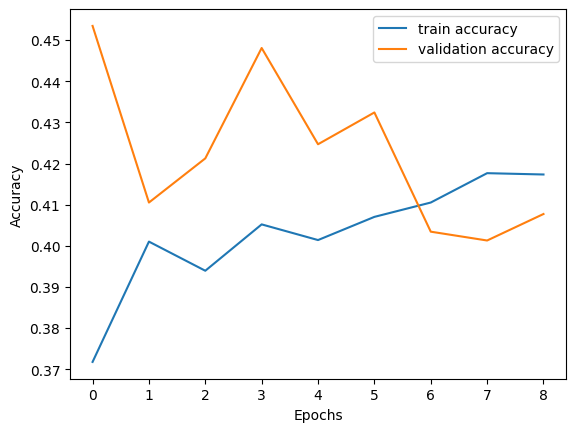

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Accuracy: 0.448068669527897

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.47      0.29       586
           1       0.50      0.40      0.44      1993
           2       0.57      0.49      0.53      2081

    accuracy                           0.45      4660
   macro avg       0.43      0.45      0.42      4660
weighted avg       0.49      0.45      0.46      4660



In [ ]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Focal Loss
model.compile(optimizer=Adam(learning_rate=0.001), loss=focal_loss(), metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping], class_weight=class_weight_dict, verbose=1)

# Plot the training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
y_val_pred = model.predict(X_val).argmax(axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Apply SMOTE and Undersampling (using SMOTEENN)
smote_enn = SMOTEENN(random_state=42)  # Combine SMOTE and ENN (Edited Nearest Neighbors)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after SMOTE and undersampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 2: Compute class weights for cost-sensitive learning
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_resampled),
    y=y_train_resampled
)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

# Step 3: Train the model with class weights
input_layer = Input(shape=(X_train_resampled.shape[1],))
x = Dense(64)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)
output_layer = Dense(len(np.unique(y_train_resampled)), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 4: Train the model on the resampled data with class weights
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, callbacks=[early_stopping], class_weight=class_weight_dict, verbose=1)

# Step 5: Evaluate the model
y_val_pred = model.predict(X_val).argmax(axis=1)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Class distribution after SMOTE and undersampling:
0    6604
2    1550
1    1312
Name: count, dtype: int64
Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4065 - loss: 1.0958 - val_accuracy: 0.4305 - val_loss: 1.0997
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4444 - loss: 0.9849 - val_accuracy: 0.4352 - val_loss: 1.1092
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4745 - loss: 0.9744 - val_accuracy: 0.4397 - val_loss: 1.1101
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4851 - loss: 0.9502 - val_accuracy: 0.4470 - val_loss: 1.1058
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4909 - loss: 0.9467 - val_accuracy: 0.4395 - val_loss: 1.1037
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5027 - loss: 0.9243 - val_accuracy: 0.4663 - val_loss: 1.0862
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5197 - loss: 0.9470 - val_accuracy: 0.4506 - val_loss: 1.112

In [ ]:
# from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report

# # Encode the target variable
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(train_data['JobSat_Class'])

# # Split the refined dataset into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_refined, y_encoded, test_size=0.2, random_state=42)

# # Define the model
# input_layer = Input(shape=(X_train.shape[1],))
# x = Dense(64)(input_layer)
# x = LeakyReLU()(x)
# x = Dropout(0.3)(x)
# x = Dense(32)(x)
# x = LeakyReLU()(x)
# x = Dropout(0.3)(x)
# output_layer = Dense(len(label_encoder.classes_), activation='softmax')(x)

# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Set up early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

# # Evaluate the model
# y_val_pred = model.predict(X_val).argmax(axis=1)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy}")
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


In [ ]:
# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import numpy as np
# import pandas as pd

# # Step 1: Refine feature set based on importance and correlation
# X_train_refined = X_train.drop(columns=low_correlation_features, errors='ignore')
# top_features = feature_importances.nlargest(20).index.tolist()
# refined_features = [feature for feature in top_features if feature in X_train_refined.columns]
# X_train_refined = X_train_refined[refined_features]
# print("Refined Training Data:\n", X_train_refined.head())

# # Step 2: Identify multi-label columns dynamically
# multi_label_columns = [col for col in refined_features if col in train_data.columns and train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Initialize tokenized data storage
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Step 3: Encode and pad multi-label columns before splitting
# for col in multi_label_columns:
#     tokenized = train_data[col].fillna('').str.split(';')
#     flat_labels = [item for sublist in tokenized for item in sublist if item]
#     le = LabelEncoder()
#     le.fit(flat_labels)
    
#     num_categories[col] = len(le.classes_)  # Save category count
#     tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])  # Save max length
#     print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# # Pad sequences
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)

# # Use tokenized data as inputs, then split the full dataset
# X = train_data[refined_features]
# y = train_data['JobSat_Class']

# # Encode labels for classification
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# print("Encoded labels shape:", y_encoded.shape)

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Validation set shape:", X_val.shape)

# # Step 4: Prepare multi-label inputs for model
# train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
# val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]

# # Step 5: Process other features (categorical and numeric)
# other_features_train = X_train.drop(columns=multi_label_columns, errors='ignore')
# other_features_val = X_val.drop(columns=multi_label_columns, errors='ignore')

# # Define categorical and numerical columns
# categorical_columns = ['Knowledge_8', 'Knowledge_3']
# numerical_columns = [col for col in refined_features if col not in categorical_columns and col not in multi_label_columns]

# # Encode categorical features
# for col in categorical_columns:
#     le = LabelEncoder()
#     other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
#     other_features_val[col] = le.transform(other_features_val[col].astype(str))

# # Convert 'YearsCode' and 'YearsCodePro' to numeric, handling special cases
# other_features_train['YearsCode'] = other_features_train['YearsCode'].replace({
#     'Less than 1 year': 0.5,
#     'More than 50 years': 51
# }).astype(float)
# other_features_train['YearsCodePro'] = other_features_train['YearsCodePro'].replace({
#     'Less than 1 year': 0.5,
#     'More than 50 years': 51
# }).astype(float)

# # Apply same transformation for validation set
# other_features_val['YearsCode'] = other_features_val['YearsCode'].replace({
#     'Less than 1 year': 0.5,
#     'More than 50 years': 51
# }).astype(float)
# other_features_val['YearsCodePro'] = other_features_val['YearsCodePro'].replace({
#     'Less than 1 year': 0.5,
#     'More than 50 years': 51
# }).astype(float)

# # Standardize numeric features
# scaler = StandardScaler()
# other_features_train[numerical_columns] = scaler.fit_transform(other_features_train[numerical_columns])
# other_features_val[numerical_columns] = scaler.transform(other_features_val[numerical_columns])
# print("Shape of other_features_train:", other_features_train.shape)
# print("Shape of other_features_val:", other_features_val.shape)

# # Combine all inputs for model
# train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
# val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
# print("Total train inputs:", len(train_inputs))
# print("Total val inputs:", len(val_inputs))

# # Define HyperModel with Keras Tuner
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         embedding_layers = []
#         input_layers = []

#         # Embedding layers for multi-label columns
#         for col in multi_label_columns:
#             input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#             input_layers.append(input_layer)
#             embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=16, step=8)
#             embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
#             flattened_embedding = Flatten()(embedding_layer)
#             embedding_layers.append(flattened_embedding)

#         # Input layer for other features
#         other_features_input = Input(shape=(other_features_train.shape[1],), name="other_features_input")
#         input_layers.append(other_features_input)
#         embedding_layers.append(other_features_input)

#         # Concatenate all inputs
#         concatenated = Concatenate()(embedding_layers)

#         # Dense layers with L2 regularization and dropout
#         x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32), kernel_regularizer=l2(0.001))(concatenated)
#         x = LeakyReLU()(x)
#         x = Dropout(hp.Float('dropout_rate', min_value=0.4, max_value=0.7, step=0.1))(x)
#         x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32), kernel_regularizer=l2(0.001))(x)
#         x = LeakyReLU()(x)
#         output = Dense(len(label_encoder.classes_), activation='softmax')(x)

#         model = Model(inputs=input_layers, outputs=output)
#         model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')),
#                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         return model

# # Initialize RandomSearch tuner
# tuner = RandomSearch(MyHyperModel(),
#                      objective='val_accuracy',
#                      max_trials=10,
#                      executions_per_trial=2,
#                      directory='my_tuner_dir',
#                      project_name='tune_dropout_and_other_params')

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# # Run the tuner
# print("Starting hyperparameter tuning...")
# tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping, reduce_lr])
# print("Hyperparameter tuning complete.")


In [ ]:
# Retrieve the best model found during tuning
best_model = tuner.get_best_models(num_models=1)[0]


NameError: name 'tuner' is not defined

In [ ]:
# from kerastuner import HyperModel, RandomSearch
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.regularizers import l2  # L2 regularization
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Added ReduceLROnPlateau
# import numpy as np
# import pandas as pd

# # Step 1: Identify multi-label columns dynamically
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Initialize dictionaries to store information for each multi-label column
# tokenized_data = {}
# max_lengths = {}
# num_categories = {}

# # Step 2: Process each multi-label column
# for col in multi_label_columns:
#     tokenized = train_data[col].fillna('').str.split(';')
#     flat_labels = [item for sublist in tokenized for item in sublist if item]
#     le = LabelEncoder()
#     le.fit(flat_labels)
    
#     num_categories[col] = len(le.classes_)
#     tokenized_data[col] = tokenized.apply(lambda x: le.transform([label for label in x if label]) if x else []).tolist()
#     max_lengths[col] = max(len(labels) for labels in tokenized_data[col])
#     print(f"Column '{col}': max length = {max_lengths[col]}, num categories = {num_categories[col]}")

# # Step 3: Pad sequences for each multi-label column
# for col in multi_label_columns:
#     tokenized_data[col] = pad_sequences(tokenized_data[col], maxlen=max_lengths[col], padding='post').astype(np.float32)
#     print(f"After padding, shape of '{col}' data:", tokenized_data[col].shape)

# # Step 4: Split data
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode labels for classification
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# print("Encoded labels shape:", y_encoded.shape)

# # Split into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# print("Training set shape:", X_train.shape)
# print("Validation set shape:", X_val.shape)

# # Step 5: Prepare multi-label inputs
# train_multi_label_inputs = [tokenized_data[col][:len(y_train)] for col in multi_label_columns]
# val_multi_label_inputs = [tokenized_data[col][len(y_train):] for col in multi_label_columns]
# for i, col in enumerate(multi_label_columns):
#     print(f"Shape of '{col}' train input:", train_multi_label_inputs[i].shape)
#     print(f"Shape of '{col}' val input:", val_multi_label_inputs[i].shape)

# # Step 6: Handle other features - categorical and numeric
# other_features_train = X_train.drop(columns=multi_label_columns)
# other_features_val = X_val.drop(columns=multi_label_columns)

# # Identify categorical columns
# categorical_columns = other_features_train.select_dtypes(include=['object']).columns
# print("Categorical columns:", categorical_columns)

# # Encode categorical features using LabelEncoder for simplicity
# for col in categorical_columns:
#     le = LabelEncoder()
#     other_features_train[col] = le.fit_transform(other_features_train[col].astype(str))
#     other_features_val[col] = other_features_val[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# # Standardize numeric features
# scaler = StandardScaler()
# other_features_train = scaler.fit_transform(other_features_train)
# other_features_val = scaler.transform(other_features_val)
# print("Shape of other_features_train:", other_features_train.shape)
# print("Shape of other_features_val:", other_features_val.shape)

# # Combine all inputs for model
# train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
# val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]
# print("Total train inputs:", len(train_inputs))
# print("Total val inputs:", len(val_inputs))

# # Define the number of other features
# num_other_features = other_features_train.shape[1]
# print("Number of other features:", num_other_features)

# # Define HyperModel for Keras Tuner with suggested improvements
# class MyHyperModel(HyperModel):
#     def build(self, hp):
#         embedding_layers = []
#         input_layers = []

#         # Create embedding layers for multi-label columns with reduced complexity
#         for col in multi_label_columns:
#             input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#             input_layers.append(input_layer)
#             embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=16, step=8)  # Reduced max embedding dimension
#             embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
#             flattened_embedding = Flatten()(embedding_layer)
#             embedding_layers.append(flattened_embedding)

#         # Input layer for other features
#         other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#         input_layers.append(other_features_input)
#         embedding_layers.append(other_features_input)

#         # Concatenate all inputs
#         concatenated = Concatenate()(embedding_layers)

#         # Define dense layers with increased dropout and L2 regularization
#         x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.001))(concatenated)  # Reduced L2 regularization
#         x = LeakyReLU()(x)
#         x = Dropout(hp.Float('dropout_rate', min_value=0.4, max_value=0.7, step=0.1))(x)  # Adjusted dropout range
#         x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32), 
#                   kernel_regularizer=l2(0.001))(x)
#         x = LeakyReLU()(x)
#         output = Dense(len(label_encoder.classes_), activation='softmax')(x)

#         model = Model(inputs=input_layers, outputs=output)
#         model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')),  # Adjusted learning rate range
#                       loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         return model

# # Initialize RandomSearch tuner
# tuner = RandomSearch(MyHyperModel(),
#                      objective='val_accuracy',
#                      max_trials=10,
#                      executions_per_trial=2,
#                      directory='my_tuner_dir',
#                      project_name='tune_dropout_and_other_params')

# # Define early stopping and learning rate reduction callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience for early stopping
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)  # Learning rate scheduler

# # Run the tuner with early stopping and learning rate scheduler
# print("Starting the hyperparameter tuning...")
# tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping, reduce_lr])  # Increased max epochs
# print("Hyperparameter tuning complete.")


Identified multi-label columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'BuyNewTool', 'TechEndorse', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchD

In [ ]:
# Assuming train_data is your original dataset
multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
text_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Process each column based on its type
label_encoders = {}
for col in text_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select continuous numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.difference(multi_label_columns + ['JobSat_Class'])
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])


In [ ]:
# Separate features and target
X = train_data.drop(columns=['JobSat_Class'])
y = train_data['JobSat_Class']

# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Process Multi-Label Columns by One-Hot Encoding
multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
multi_label_dummies = pd.DataFrame()

for col in multi_label_columns:
    # Split each multi-label column by ';' and perform one-hot encoding
    dummies = train_data[col].str.get_dummies(sep=';')
    dummies.columns = [f"{col}_{label}" for label in dummies.columns]
    multi_label_dummies = pd.concat([multi_label_dummies, dummies], axis=1)

# Step 2: Process Other Categorical Columns
# Identify categorical columns that are not multi-label
categorical_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Save encoder for potential use later

# Step 3: Standardize Numerical Columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.difference(multi_label_columns + ['JobSat_Class'])
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Step 4: Combine All Processed Features into a Single DataFrame
X = pd.concat([train_data[numerical_columns], train_data[categorical_columns], multi_label_dummies], axis=1)
y = train_data['JobSat_Class']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 5: Fit RandomForest model to assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

# Step 6: Check Feature Importance and Select Top Features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(20)  # Top 20 features
print("Top 20 Important Features:\n", important_features)


Top 20 Important Features:
 ResponseId                                                                           0.012536
WorkExp                                                                              0.012451
ConvertedCompYearly                                                                  0.010747
JobSatPoints_7                                                                       0.008048
JobSatPoints_6                                                                       0.007980
JobSatPoints_1                                                                       0.007809
JobSatPoints_8                                                                       0.007355
JobSatPoints_9                                                                       0.006589
JobSatPoints_10                                                                      0.005369
JobSatPoints_5                                                                       0.005231
JobSatPoints_11                 

In [ ]:
# # Correlation with target for continuous variables
# corr_with_target = train_data.corr()['JobSat_Class'].sort_values(ascending=False)
# print("Features most correlated with target:\n", corr_with_target.head(10))


In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# # Mutual information for categorical features
# categorical_columns = train_data.select_dtypes(include=['object']).columns.difference(multi_label_columns + ['JobSat_Class'])
# mutual_info = mutual_info_classif(train_data[categorical_columns], y_encoded, discrete_features=True)
# mutual_info_series = pd.Series(mutual_info, index=categorical_columns).sort_values(ascending=False)
# print("Top categorical features based on mutual information:\n", mutual_info_series.head(10))


In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # RFE with a logistic regression model to rank features
# model = LogisticRegression(max_iter=1000)
# rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
# rfe.fit(train_data.drop(columns=['JobSat_Class']), y_encoded)

# # Features selected by RFE
# selected_features = train_data.columns[rfe.support_]
# print("Top features selected by RFE:\n", selected_features)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# # Scale data before L1 regularization
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(train_data.drop(columns=['JobSat_Class']))

# # Logistic regression with L1 penalty
# l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
# l1_model.fit(X_scaled, y_encoded)

# # Select non-zero coefficient features
# l1_selected_features = train_data.columns[l1_model.coef_[0] != 0]
# print("Features selected by L1 regularization:\n", l1_selected_features)


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

# # Prepare data for a quick feature importance check
# X = train_data.drop(columns=['JobSat_Class'])
# y = train_data['JobSat_Class']

# # Encode categorical target
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Fit a random forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y_encoded)

# # Check feature importance
# feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# important_features = feature_importances.nlargest(20)  # Top 20 features
# print("Top 20 Important Features:\n", important_features)


In [ ]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import l2  # L2 regularization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

# Step 1-3: Identical multi-label column processing steps as above
# (Tokenize, pad, and split into train/val sets)

# Combine all inputs for model
train_inputs = train_multi_label_inputs + [other_features_train.astype(np.float32)]
val_inputs = val_multi_label_inputs + [other_features_val.astype(np.float32)]

# Define HyperModel with suggested improvements
class MyHyperModel(HyperModel):
    def build(self, hp):
        embedding_layers = []
        input_layers = []

        # Create embedding layers for multi-label columns
        for col in multi_label_columns:
            input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
            input_layers.append(input_layer)
            embedding_dim = hp.Int('embedding_dim', min_value=8, max_value=32, step=8)  # Expanded max embedding dimension
            embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            embedding_layers.append(flattened_embedding)

        # Input layer for other features
        other_features_input = Input(shape=(num_other_features,), name="other_features_input")
        input_layers.append(other_features_input)
        embedding_layers.append(other_features_input)

        # Concatenate all inputs
        concatenated = Concatenate()(embedding_layers)

        # Define dense layers with BatchNormalization, Dropout, and adjusted regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(concatenated)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)

        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        model = Model(inputs=input_layers, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params')

# Define early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Reloading Tuner from my_tuner_dir\tune_dropout_and_other_params\tuner0.json
Starting the hyperparameter tuning...
Hyperparameter tuning complete.


In [ ]:
# Assuming the tuner has already been reloaded as 'tuner'
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print("Embedding Dimension:", best_hps.get('embedding_dim'))
print("Dense Units:", best_hps.get('dense_units'))
print("Dropout Rate:", best_hps.get('dropout_rate'))
print("Second Dense Units:", best_hps.get('dense_units_2'))
print("Learning Rate:", best_hps.get('learning_rate'))
# print("L2 Regularization:", best_hps.get('l2_reg'))


Best Hyperparameters:
Embedding Dimension: 8
Dense Units: 32
Dropout Rate: 0.6000000000000001
Second Dense Units: 64
Learning Rate: 0.00010709246164219468


In [ ]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])

# Evaluate on validation data or test data
val_loss, val_accuracy = best_model.evaluate(val_inputs, y_val)
print("Validation Accuracy:", val_accuracy)


Epoch 1/50


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Employment_input', 'CodingActivities_input', 'LearnCode_input', 'LearnCodeOnline_input', 'TechDoc_input', 'BuyNewTool_input', 'TechEndorse_input', 'LanguageHaveWorkedWith_input', 'LanguageWantToWorkWith_input', 'LanguageAdmired_input', 'DatabaseHaveWorkedWith_input', 'DatabaseWantToWorkWith_input', 'DatabaseAdmired_input', 'PlatformHaveWorkedWith_input', 'PlatformWantToWorkWith_input', 'PlatformAdmired_input', 'WebframeHaveWorkedWith_input', 'WebframeWantToWorkWith_input', 'WebframeAdmired_input', 'EmbeddedHaveWorkedWith_input', 'EmbeddedWantToWorkWith_input', 'EmbeddedAdmired_input', 'MiscTechHaveWorkedWith_input', 'MiscTechWantToWorkWith_input', 'MiscTechAdmired_input', 'ToolsTechHaveWorkedWith_input', 'ToolsTechWantToWorkWith_input', 'ToolsTechAdmired_input', 'NEWCollabToolsHaveWorkedWith_input', 'NEWCollabToolsWantT

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\msn\anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\Users\msn\anaconda3\lib\runpy.py", line 87, in _run_code

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\msn\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\Users\msn\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\Users\msn\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\msn\AppData\Local\Temp\ipykernel_9256\701408802.py", line 6, in <module>

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of -1 which is outside the valid range of [0, 3).  Label values: 0 0 0 0 0 -1 0 0 0 0 0 0 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -1 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1070902]

In [ ]:
for trial in tuner.oracle.get_best_trials(num_trials=5):
    print(f"Trial ID: {trial.trial_id}")
    print("Hyperparameters:", trial.hyperparameters.values)
    print("Score:", trial.score)


In [ ]:
best_model.save('best_job_satisfaction_model.h5')


In [ ]:
from itertools import combinations  # Import combinations for pairing columns
from collections import Counter
import pandas as pd

# Step 1: Define function to get term frequencies and identify popular terms dynamically
def get_popular_terms(column_data, top_n=10):
    term_counter = Counter()
    for row in column_data.fillna(''):
        terms = row.split(';')
        term_counter.update(terms)
    return [term for term, _ in term_counter.most_common(top_n)]

# Step 2: Automatically aggregate categories for each multi-label column
def aggregate_column_terms(df, column_name, top_terms):
    # For each row, check if any of the top terms are present, group by frequency
    return df[column_name].fillna('').apply(lambda x: ';'.join(set(label for label in x.split(';') if label in top_terms)))

# Step 3: Apply to all multi-label columns, store aggregations in dictionaries for later concatenation
multi_label_aggregations = {}
multi_label_popular_terms = {}
new_features = {}  # Dictionary to hold all new features before concatenation

for col in multi_label_columns:
    # Identify top terms for this column
    top_terms = get_popular_terms(train_data[col], top_n=10)  # Adjust `top_n` as needed
    multi_label_popular_terms[col] = top_terms
    
    # Aggregate and create new column for popular terms
    new_features[f'{col}_aggregated'] = aggregate_column_terms(train_data, col, top_terms)
    new_features[f'{col}_count'] = train_data[col].fillna('').apply(lambda x: len(x.split(';')))

    # Create binary indicators for each popular term
    for term in top_terms:
        new_features[f'uses_{col}_{term}'] = train_data[col].fillna('').apply(lambda x: 1 if term in x.split(';') else 0)

# Step 4: Optional - Create interaction features for selected column pairs
for col1, col2 in combinations(multi_label_columns, 2):
    new_features[f'{col1}_{col2}_interaction'] = train_data.apply(
        lambda x: len(set(x[col1].split(';')) & set(x[col2].split(';'))) 
        if pd.notna(x[col1]) and pd.notna(x[col2]) else 0, axis=1
    )

# Step 5: Concatenate all new features with the original DataFrame in one step
train_data = pd.concat([train_data, pd.DataFrame(new_features)], axis=1)

# Summary of engineered features
print("Feature engineering complete with dynamic grouping and aggregation.")
print(train_data.head())


Feature engineering complete with dynamic grouping and aggregation.
       ResponseId  MainBranch  Age  \
16835   -0.670274           0    1   
40638    0.707344           0    1   
39715    0.653925           0    1   
39649    0.650105           0    1   
44832    0.950075           0    1   

                                              Employment  RemoteWork  Check  \
16835  Employed, full-time;Independent contractor, fr...           1      0   
40638                                Employed, full-time           1      0   
39715                                Employed, full-time           2      0   
39649                                Employed, full-time           2      0   
44832                                Employed, full-time           0      0   

                                        CodingActivities  EdLevel  \
16835           Hobby;Contribute to open-source projects        1   
40638  Professional development or self-paced learnin...        1   
39715  Hobby;Professi

In [ ]:
# Check the row count of train_data to see if it matches with X and y
print(f"train_data shape: {train_data.shape}")
print(f"JobSat_Class (target variable) shape: {train_data['JobSat_Class'].shape}")


train_data shape: (23300, 2369)
JobSat_Class (target variable) shape: (23300,)


In [ ]:
# Select only the engineered columns from the original train_data to avoid filtering issues
engineered_columns = [col for col in train_data.columns if 'aggregated' in col or 'count' in col or 'uses_' in col or '_interaction' in col]
train_data_engineered = train_data[engineered_columns]

# Verify the shape of the resulting X
print(f"train_data_engineered shape: {train_data_engineered.shape}")


train_data_engineered shape: (23300, 2255)


In [ ]:
# Redefine X and y to ensure they are consistent
X = train_data[engineered_columns]  # Should match the shape of train_data
y = train_data['JobSat_Class']  # Ensure y is directly from train_data to avoid mismatch
print(f"Final X shape: {X.shape}, Final y shape: {y.shape}")


Final X shape: (23300, 2255), Final y shape: (23300,)


In [ ]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Dense, Input, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import numpy as np
import pandas as pd

# Confirm that train_data and JobSat_Class are based on the same rows
train_data = train_data.dropna(subset=['JobSat_Class'])  # Drop rows without target labels if any

# Step 1: Prepare engineered features with consistent row count
# top_features = [
#     'WorkExp', 'ResponseId', 'ConvertedCompYearly', 'JobSatPoints_1', 'Frustration_count',
#     'Frustration_aggregated_count', 'JobSatPoints_7', 'JobSatPoints_6', 'ProfessionalTech_aggregated_count',
#     'JobSatPoints_8', 'LanguageHaveWorkedWith_count', 'LearnCodeOnline_count', 'LanguageWantToWorkWith_count',
#     'ProfessionalTech_count', 'JobSatPoints_9', 'LearnCodeOnline_aggregated_count', 'ToolsTechHaveWorkedWith_count',
#     'LanguageHaveWorkedWith_aggregated_count', 'LearnCode_count', 'TechEndorse_count'
# ]


top_features = [
    'WorkExp', 'ConvertedCompYearly', 'JobSatPoints_1', 'JobSatPoints_7', 'JobSatPoints_6', 'JobSatPoints_9', 'JobSatPoints_8', 'JobSatPoints_10', 'JobSatPoints_5', 'JobSatPoints_11'
]
train_data_engineered = train_data[top_features]

# Check the final row count after filtering
X = train_data_engineered
y = train_data['JobSat_Class']
assert len(X) == len(y), f"Inconsistent sample sizes: X has {len(X)}, y has {len(y)}"  # Ensure alignment

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Prepare inputs for the model
train_inputs = [X_train_scaled.astype(np.float32)]
val_inputs = [X_val_scaled.astype(np.float32)]

# Define HyperModel with suggested improvements
class MyHyperModel(HyperModel):
    def build(self, hp):
        input_layer = Input(shape=(X_train_scaled.shape[1],), name="engineered_features_input")
        
        # First dense layer with BatchNormalization, Dropout, and L2 regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(input_layer)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Second dense layer
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Output layer for classification
        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Reloading Tuner from my_tuner_dir\tune_dropout_and_other_params\tuner0.json
Starting the hyperparameter tuning...
Hyperparameter tuning complete.


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")


Best Hyperparameters:
embedding_dim: 8
dense_units: 32
dropout_rate: 0.6000000000000001
dense_units_2: 64
learning_rate: 0.00010709246164219468


In [ ]:
# Rebuild the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the final model on the entire dataset
history = model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val), 
                    epochs=50, callbacks=[early_stopping])


Epoch 1/50


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: engineered_features_input. Received: the structure of inputs=('*',)
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3371 - loss: 1.4268 - val_accuracy: 0.4717 - val_loss: 1.0773
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4163 - loss: 1.2054 - val_accuracy: 0.4766 - val_loss: 1.0518
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4383 - loss: 1.1509 - val_accuracy: 0.4594 - val_loss: 1.0451
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4534 - loss: 1.1211 - val_accuracy: 0.4616 - val_loss: 1.0414
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4514 - loss: 1.1062 - val_accuracy: 0.4586 - val_loss: 1.0377
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4503 - loss: 1.1004 - val_accuracy: 0.4575 - val_loss: 1.0374
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4572 - loss: 1.0875 - val_accuracy: 0.4685 - val_loss: 1.0376
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4423 - loss: 1.0937 - val_accuracy: 0.4607 - val_

In [ ]:
model.save('final_model.h5')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features if they are not yet standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix

# Step 2: Apply PCA and retain components that explain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Check the number of components retained
print(f"Number of components after PCA: {X_pca.shape[1]}")

# Step 4: Proceed with your training and validation splits on the PCA-transformed data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


Number of components after PCA: 9


In [ ]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import numpy as np

# Step 1: Prepare PCA-transformed data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Step 2: Prepare inputs for the model
train_inputs = [X_train_pca.astype(np.float32)]
val_inputs = [X_val_pca.astype(np.float32)]

# Define HyperModel with PCA-transformed inputs
class MyHyperModel(HyperModel):
    def build(self, hp):
        # Input layer for the PCA-transformed features
        input_layer = Input(shape=(X_train_pca.shape[1],), name="pca_features_input")
        
        # First dense layer with BatchNormalization, Dropout, and L2 regularization
        x = Dense(hp.Int('dense_units', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(input_layer)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Second dense layer
        x = Dense(hp.Int('dense_units_2', min_value=32, max_value=96, step=32),
                  kernel_regularizer=l2(hp.Choice('l2_reg', [0.001, 0.0005, 0.0001])))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float('dropout_rate_2', min_value=0.3, max_value=0.6, step=0.1))(x)
        
        # Output layer for classification
        output = Dense(len(label_encoder.classes_), activation='softmax')(x)

        # Define an exponential decay schedule for the learning rate
        initial_lr = hp.Float('learning_rate', 1e-4, 5e-4, sampling='log')
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=initial_lr, decay_steps=10000, decay_rate=0.9)

        # Compile model
        model = Model(inputs=input_layer, outputs=output)
        model.compile(optimizer=Adam(learning_rate=lr_schedule),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

# Initialize RandomSearch tuner
tuner = RandomSearch(MyHyperModel(),
                     objective='val_accuracy',
                     max_trials=10,
                     executions_per_trial=2,
                     directory='my_tuner_dir',
                     project_name='tune_dropout_and_other_params_pca')

# Define early stopping callback with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Run the tuner with early stopping
print("Starting the hyperparameter tuning with PCA features...")
tuner.search(train_inputs, y_train, validation_data=(val_inputs, y_val), epochs=50, callbacks=[early_stopping])
print("Hyperparameter tuning complete.")


Trial 10 Complete [00h 02m 48s]
val_accuracy: 0.4962446242570877

Best val_accuracy So Far: 0.498927041888237
Total elapsed time: 00h 28m 44s
Hyperparameter tuning complete.


In [ ]:
# from tensorflow.keras.optimizers import Adam

# # Clean column names to remove leading/trailing spaces
# train_data.columns = train_data.columns.str.strip()

# # Re-identify multi-label columns based on cleaned column names
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]

# # Print identified multi-label columns for verification
# print("Identified multi-label columns:", multi_label_columns)

# # Rest of your code remains the same, building input layers for each multi-label column dynamically
# try:
#     embedding_layers = []
#     input_layers = []

#     for col in multi_label_columns:
#         input_layer = Input(shape=(max_lengths[col],), name=f"{col}_input")
#         embedding_layer = Embedding(input_dim=num_categories[col] + 1, output_dim=16, input_length=max_lengths[col])(input_layer)
#         flattened_embedding = Flatten()(embedding_layer)
#         input_layers.append(input_layer)
#         embedding_layers.append(flattened_embedding)

#     # Add the "other features" input as the final input layer
#     other_features_input = Input(shape=(num_other_features,), name="other_features_input")
#     input_layers.append(other_features_input)
#     embedding_layers.append(other_features_input)

#     # Concatenate all embeddings and other features
#     concatenated = Concatenate()(embedding_layers + [other_features_input])
#     print("Shape after concatenation (expected 20744):", concatenated.shape)

#     # Adjust Dense layer to match concatenated shape
#     x = Dense(64, activation='relu')(concatenated)
#     output = Dense(3, activation='softmax')(x)

#     # Set a fixed learning rate
#     model = Model(inputs=input_layers, outputs=output)
#     model.compile(optimizer=Adam(learning_rate=1e-3),  # Use a fixed learning rate
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Verify model structure
#     model.summary()

# except KeyError as e:
#     print(f"KeyError encountered: {e}")
#     print("Check if all multi-label columns are defined correctly.")


In [ ]:
# # Function to sanitize column names for TensorFlow compatibility
# def sanitize_column_name(column_name):
#     import re
#     return re.sub(r'[^A-Za-z0-9_]', '_', column_name)

# sanitized_column_names = {col: sanitize_column_name(col) for col in multi_label_columns}


In [ ]:
# # Create input dictionary for multi-label columns using sanitized names
# train_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_train[col])) for col in multi_label_columns}


In [ ]:
# # Check the types of each element in train_inputs
# for idx, input_data in enumerate(train_inputs):
#     print(f"train_inputs[{idx}] type: {type(input_data)}")


In [ ]:
# import numpy as np

# # Convert elements in train_inputs to arrays if they are not already
# train_inputs = [np.array(input_data) if isinstance(input_data, str) else input_data for input_data in train_inputs]

# # Now, check the shapes
# for idx, input_data in enumerate(train_inputs):
#     print(f"Shape of train_inputs[{idx}]: {input_data.shape}")


In [ ]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.layers import Embedding, Input, Flatten, Dense, Concatenate
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.callbacks import EarlyStopping
# from keras_tuner import RandomSearch, HyperParameters
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam
# import re

# # Assuming train_data and test_data are already loaded as DataFrames

# # Identify multi-label columns dynamically based on the delimiter (e.g., ';')
# multi_label_columns = [col for col in train_data.columns if train_data[col].apply(lambda x: isinstance(x, str) and ';' in x).any()]
# print("Identified multi-label columns:", multi_label_columns)

# # Function to sanitize column names for TensorFlow compatibility
# def sanitize_column_name(column_name):
#     return re.sub(r'[^A-Za-z0-9_]', '_', column_name)

# sanitized_column_names = {col: sanitize_column_name(col) for col in multi_label_columns}

# # Preprocess non-numeric columns
# def preprocess_data(df, multi_label_columns):
#     for col in df.select_dtypes(include=['object']).columns:
#         if col not in multi_label_columns:
#             le = LabelEncoder()
#             df[col] = le.fit_transform(df[col].astype(str))
#     return df

# # Preprocess training and test datasets
# train_data_processed = preprocess_data(train_data.copy(), multi_label_columns)
# test_data_processed = preprocess_data(test_data.copy(), multi_label_columns)

# # Handle multi-label columns with padding
# max_lengths = {}
# num_categories = {}
# for col in multi_label_columns:
#     sanitized_col = sanitized_column_names[col]
#     train_data_processed[col] = train_data_processed[col].fillna('').str.split(';')
#     test_data_processed[col] = test_data_processed[col].fillna('').str.split(';')

#     le = LabelEncoder()
#     flattened_labels = [item for sublist in train_data_processed[col] for item in sublist if item]
#     le.fit(flattened_labels)

#     max_lengths[sanitized_col] = max(len(x) for x in train_data_processed[col])
#     num_categories[sanitized_col] = len(le.classes_)

#     train_data_processed[col] = pad_sequences([le.transform(labels) for labels in train_data_processed[col]], maxlen=max_lengths[sanitized_col], padding='post')
#     test_data_processed[col] = pad_sequences([le.transform(labels) for labels in test_data_processed[col]], maxlen=max_lengths[sanitized_col], padding='post')

# # Prepare features and target variable
# y_train = train_data_processed['JobSat_Class']
# X_train = train_data_processed.drop(columns=['JobSat_Class'])
# y_test = test_data_processed['JobSat_Class']
# X_test = test_data_processed.drop(columns=['JobSat_Class'])

# # Create input dictionary for multi-label columns using sanitized names
# train_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_train[col])) for col in multi_label_columns}

# # Expand dimensions for single-value inputs in train_inputs
# for key in train_inputs.keys():
#     if train_inputs[key].ndim == 1:
#         train_inputs[key] = np.expand_dims(train_inputs[key], axis=-1)

# # Add other features input
# other_features_input_train = train_data_processed.drop(columns=multi_label_columns + ['JobSat_Class']).values
# train_inputs["other_features_input"] = other_features_input_train

# # Setting up hyperparameters and model building function
# def build_model(hp):
#     input_layers = []
#     embedding_layers = []

#     # Loop through multi-label columns to create inputs and embeddings
#     for col, max_len in max_lengths.items():
#         input_layer = Input(shape=(max_len,), name=f"{sanitize_column_name(col)}_input")
#         input_layers.append(input_layer)

#         # Embedding layer with tunable dimensions
#         embedding_layer = Embedding(
#             input_dim=num_categories[col] + 1,
#             output_dim=hp.Int('embedding_dim', min_value=16, max_value=128, step=16),
#             name=f"embedding_{col}"
#         )(input_layer)

#         flattened_embedding = Flatten()(embedding_layer)
#         embedding_layers.append(flattened_embedding)
        
#         # Debug: print each embedding shape
#         print(f"Shape of flattened embedding for {col}: {flattened_embedding.shape}")

#     # Additional input for other features
#     other_features_input = Input(shape=(other_features_input_train.shape[1],), name="other_features_input")
#     input_layers.append(other_features_input)
#     embedding_layers.append(other_features_input)

#     # Concatenate all embeddings and other features
#     concatenated = Concatenate()(embedding_layers)
#     print("Shape after concatenation:", concatenated.shape)

#     # Dense layer after concatenation
#     x = Dense(hp.Int('num_units', min_value=32, max_value=256, step=32), activation='relu')(concatenated)
#     output = Dense(3, activation='softmax')(x)

#     model = Model(inputs=input_layers, outputs=output)
#     model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
#                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Initialize Keras Tuner
# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=5,
#     executions_per_trial=1,
#     directory='my_dir',
#     project_name='job_satisfaction_tuning'
# )

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Run the tuner search with training inputs
# tuner.search(train_inputs, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# # Retrieve best model and hyperparameters
# best_model = tuner.get_best_models(num_models=1)[0]
# best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("Best learning rate:", best_hyperparameters['learning_rate'])
# print("Best number of units:", best_hyperparameters['num_units'])
# print("Best embedding dimension:", best_hyperparameters['embedding_dim'])

# # Save and load the best model
# best_model.save('best_model.keras')
# best_model = load_model('best_model.keras')

# # Prepare test inputs with sanitized column names
# test_inputs = {f"{sanitized_column_names[col]}_input": np.array(list(X_test[col])) for col in multi_label_columns}

# # Expand dimensions for single-value inputs in test_inputs
# for key in test_inputs.keys():
#     if test_inputs[key].ndim == 1:
#         test_inputs[key] = np.expand_dims(test_inputs[key], axis=-1)

# # Add other features input for test data
# other_features_input_test = test_data_processed.drop(columns=multi_label_columns + ['JobSat_Class']).values
# test_inputs["other_features_input"] = other_features_input_test

# # Evaluate the model on test data
# test_loss, test_accuracy = best_model.evaluate(test_inputs, y_test)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

# # Make predictions
# predictions = best_model.predict(test_inputs)
# predicted_classes = np.argmax(predictions, axis=1)
# print("Predicted classes:", predicted_classes)


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In your project for predicting job satisfaction using a deep learning approach with embeddings, several important aspects might need further attention to enhance the model's performance and overall effectiveness. Here are some key areas to consider:

1. **Data Quality and Cleaning**:
   - **Handling Missing Values**: Ensure that any missing values in the dataset are appropriately handled before training the model. You can consider imputation strategies, removing rows, or filling with default values based on domain knowledge.
   - **Outlier Detection**: Identify and handle outliers in the dataset that could adversely affect model training and predictions.

2. **Feature Engineering**:
   - **Feature Selection**: Conduct exploratory data analysis (EDA) to identify which features are most correlated with job satisfaction. You may want to explore advanced feature selection techniques beyond simple correlation, such as Recursive Feature Elimination (RFE) or LASSO regression.
   - **Creation of New Features**: Consider creating additional features that could provide more context or insights, such as interaction terms between different features.

3. **Embeddings Optimization**:
   - **Tuning Embedding Dimensions**: The choice of embedding dimensions (e.g., 16 in your case) may require optimization. Experimenting with different sizes might yield better performance.
   - **Pre-trained Embeddings**: If applicable, consider using pre-trained embeddings (e.g., GloVe, Word2Vec) for text data, which might provide richer representations than learning from scratch.

4. **Model Architecture**:
   - **Hyperparameter Tuning**: The current hyperparameter tuning is a good start, but consider expanding the search space (e.g., different architectures, activation functions, dropout rates) to find the optimal configuration.
   - **Regularization**: Incorporate techniques such as dropout or L2 regularization to prevent overfitting, especially if the model is complex or if you have limited data.
   - **Early Stopping**: Implement early stopping based on validation metrics to avoid overfitting and save training time.

5. **Evaluation Metrics**:
   - **Comprehensive Evaluation**: Use a variety of metrics beyond accuracy, especially if your classes are imbalanced (e.g., precision, recall, F1-score, ROC-AUC) to get a clearer picture of model performance.
   - **Cross-Validation**: Implement k-fold cross-validation to ensure that the model's performance is robust and not reliant on a particular train/test split.

6. **Interpretability**:
   - **Feature Importance Analysis**: Utilize techniques such as SHAP or LIME to interpret the model’s predictions and understand which features have the most significant impact on job satisfaction.
   - **Visualizations**: Create visualizations to understand data distributions, correlations, and model predictions to make informed decisions based on the results.

7. **Scalability and Deployment**:
   - **Model Deployment**: Consider how the model will be deployed in a production environment. You may need to develop a web application or API to serve predictions.
   - **Performance Monitoring**: Once deployed, set up monitoring to track model performance over time and identify potential drifts in data distribution.

By addressing these aspects, you can enhance the robustness and performance of your project, leading to more reliable predictions of job satisfaction. If you have specific areas where you would like more detailed suggestions, feel free to ask!